# A Dissection of the Academy's Most Sought After Award: Best Picture 


## Kristian Osmeña Rüegg (kor220) and Heather Canul Peña (hcp263)

## Abstract




The Academy Awards are the oldest international worldwide entertainment ceremony  which also bestows the most prestigious accolades in the film industry. Winning an Academy Award/Oscar can be considered the single-greatest critical accomplishment for film professionals. These Oscars have long drawn media attention, but the ending of the 89th Academy Awards created new scrutiny. The mix-up between announcing *La La Land* (which was the predicted top winner by many critics) as Best Picture when the award actually went to *Moonlight*, sparked numerous articles and think-pieces revolving issues of race, PR stunts, and how the Oscars really work. Following the event, the general public learned about the backstage procedures set in place that are theoretically supposed to prevent these types of mistakes. Not only did this put the spotlight on how the Oscars operates during the awards show, but it also sparked interest into what exactly makes a film Best Picture worthy in the first place. *What does it take to win this award?*

**Our question:** What are the key components of a Best Picture and how do they compare to those of the "average" movie? And if we were to make a film today, what   characteristics should we implement in order to give our film a better chance of winning Best Picture (e.g. genre, runtime, rating, star, director, production company, etc).

We will be conducting our report using two datasets. One is from Kaggle and is a list of 6000 movies between the years 1986-2016. Its original variables include: name, budget, company, country, director, genre, gross, rating, released, runtime, score, star, votes, writer, and year. The original data in this csv file is from IMDB. The other dataset is from the University of Waterloo and is a list of all of the Oscar Best Pictures from 1927- 2014. Its original variables include: name, year, nominations, rating duration, genre1, genre 2, release, metacritic, and synopsis. 

https://www.kaggle.com/danielgrijalvas/movies

https://cs.uwaterloo.ca/~s255khan/oscars.html

We will be comparing observations in the respective variables between Movies and Best Pictures to see how much the statistics for a Best Picture deviate from the average movie. 

Our report will be broken down into 3 sections: 

* Data Cleaning

* Data Analysis and Plotting 

* Conclusion  


# Importing Packages

First, we will begin by importing the necessary packages before we import our datasets.


In [1]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import matplotlib as mpl
%matplotlib inline
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 
import seaborn as sns                  # seaborn for data visualization


We'll be starting with our *movies* dataset containing over 6000 movies released between 1986 to 2016. As we import this data, we will also be checking the dtypes of each variable using the **.dtypes** function.

In [2]:
movies = '/Users/heatherpena/Desktop/movies.csv'
movies = pd.read_csv(movies, encoding = 'latin-1')

print('Variable dtypes:\n\n', movies.dtypes, sep='')

movies.head()

Variable dtypes:

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


**Comment:** This is mostly text data, which means it's assigned the dtype object. The variables are already short and lowercased, making the data easier to work with while we analyze.

In [3]:
print('Dimensions:',movies.shape) #check number of rows and columns in dataframe

Dimensions: (6819, 15)


# Data Cleaning

**Next Steps:** We are assuming there will be duplicates in this dataframe, which will skew the data. We'll begin by checking for duplicates, and if they are found we will drop them using the **drop_dupicates( )** function.

In [4]:
movies.name.duplicated().sum() #find total sum of duplicates

88

In [5]:
movies = movies.drop_duplicates(subset= 'name', keep='first', inplace=False)

movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


We are printing the dimensions once again to ensure the duplicates were dropped. We can see here that 88 rows have indeed been dropped. 

In [6]:
print('Dimensions:', movies.shape) #find new dimensions

Dimensions: (6731, 15)


In [7]:
movies['profitability']=movies['gross']/movies['budget'] #create profitability column
movies['title']=movies['name'] #create title column 
movies['release_year']=movies['year'] #create release year column

We are adding 3 new columns. Title and release year are being added in case we later decide to index the dataframe by those two variables. This way, we can still use the two new columns as variables for analysis. We added a profitabilty variable to by using gross/budget as a multiple to see how profitable each respective movie is compared to its budget.

In [8]:
movies #run to make sure new variables were added

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profitability,title,release_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,6.535927,Stand by Me,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,11.689395,Ferris Bueller's Day Off,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,11.986707,Top Gun,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,4.603257,Aliens,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,2.062735,Flight of the Navigator,1986
5,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,23.088428,Platoon,1986
6,25000000,Henson Associates (HA),UK,Jim Henson,Adventure,12729917,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986,0.509197,Labyrinth,1986
7,6000000,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986,1.425205,Blue Velvet,1986
8,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986,4.496851,Pretty in Pink,1986
9,15000000,SLM Production Group,USA,David Cronenberg,Drama,40456565,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986,2.697104,The Fly,1986


Although profitability has been added, there are many rows that have been calculated with a profitability of infinity. This is because many movies in the dataframe have budgets of 0, so gross/0 equals infinity. We will be addressing this next.  

In [9]:
mean_profit = (movies.loc[movies['profitability'] != np.inf]['profitability'].mean()) #calculate mean profit but disregard infinity


In [10]:
print(mean_profit) #print mean profit 

4.221052580440213


In [11]:
for index,row in movies.iterrows():
    if(row['budget'] == 0):
        movies.at[index,'budget'] = (movies.at[index,'gross']/mean_profit)#calculate estimated budget for moves with no budget

Although the dataframe had numerous 0 values in the budget category, we decided not to drop those respective movies. However, we had to change them from 0 to something else. Taking the average budget later on with values of 0 would skew the data to be less than it should be. However, we noticed that the repective movies with 0 budget were low-profile movies, so changing all the 0 values to null values or even dropping them altogether would make the average movie budget biased toward higher-budget movies. Therefore, we decided to use the profitability variable to calculate the average profitabilty across the 6000 movies (we didn't have the budget for all movies, but we have the domestic gross for all movies). But since the profitabilty multiple = gross/budget, all the movies with 0 (or null when we converted it) resulted in a profitability multiple of infinity. To avoid this, we wrote a line which disregarded the infinity values when calculating profitability. Using the average profitability, we divided the gross of each movie with a 0 budget by this number (4.22) to calculate a more accurate budget that those respective movies should have been around, thus making the data less skewed. 

In [12]:
movies['profitability']=movies['gross']/movies['budget']
movies #run to make sure profitability variable is fixed with no infinity values

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profitability,title,release_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,6.535927,Stand by Me,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,11.689395,Ferris Bueller's Day Off,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,11.986707,Top Gun,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,4.603257,Aliens,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,2.062735,Flight of the Navigator,1986
5,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,23.088428,Platoon,1986
6,25000000,Henson Associates (HA),UK,Jim Henson,Adventure,12729917,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986,0.509197,Labyrinth,1986
7,6000000,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986,1.425205,Blue Velvet,1986
8,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986,4.496851,Pretty in Pink,1986
9,15000000,SLM Production Group,USA,David Cronenberg,Drama,40456565,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986,2.697104,The Fly,1986


In [13]:
movies.isnull().any() #checks if there are any null values in the dataframe

budget           False
company          False
country          False
director         False
genre            False
gross            False
name             False
rating           False
released         False
runtime          False
score            False
star             False
votes            False
writer           False
year             False
profitability    False
title            False
release_year     False
dtype: bool

Now we can see the Movies dataframe has been cleaned and there are no null values.

## Oscar Winners Dataframe

Next, we will import the dataset containing the full list of Oscar winners from 1927 to 2014. 

  **Comment:** It is important to note that this dataset is missing the years 2015 and 2016. We will later be appending the missing data manually to match the 2016 endate from the Movies dataframe. Additionally, the original Movies dataframe has movies from 1986 - 2016 and the oscar_winners dataframe contains movies from 1927-2014. In order to have a more accurate analysis of the key characteristics of Best Pictures compared to Movies, we are making sure the years parallel. Therefore, we will only be using oscar_winners rows from 1986-2014. But this leaves us with n<30, another reason why we will be appending the dataframe to include winners up until 2016.   

In [14]:
oscar_winners = pd.read_csv('/Users/heatherpena/Desktop/pictures.csv')
oscar_winners.head()

,name,year,nominations,rating,duration,genre1,genre2,release,metacritic,synopsis
0,Birdman,2014,9,7.8,119,Comedy,Drama,November,88.0,Illustrated upon the progress of his latest Br...
1,12 Years a Slave,2013,9,8.1,134,Biography,Drama,November,97.0,In the antebellum United States Solomon Northu...
2,Argo,2012,7,7.8,120,Biography,Drama,October,86.0,Acting under the cover of a Hollywood producer...
3,The Artist,2011,10,8.0,100,Comedy,Drama,October,89.0,A silent movie star meets a young dancer but t...
4,The King's Speech,2010,12,8.0,118,Biography,Drama,December,88.0,The story of King George VI of the United King...


In [15]:
oscar_winners.shape #find length of rows/columns 

(87, 10)

In [16]:
print('Variable dtypes:\n\n', oscar_winners.dtypes, sep='') #print dtypes

Variable dtypes:

name            object
year             int64
nominations     object
rating         float64
duration         int64
genre1          object
genre2          object
release         object
metacritic     float64
synopsis        object
dtype: object


Similar to the Movies dataframe, most of this is text data, meaning our dtype is object. The column names are already lowercase, so these will not need to be changed. 

We will be removing the white space at the beginning of each name (It took a great deal of time to figure out that there were white spaces before the movie titles, which at first prevented us from being able to write a loop of extracting the oscar_winners into a new dataframe). 

In [17]:
oscar_winners['name'].replace("\\s(.*)", value=r"\1", regex=True, inplace=True) #get rid of white space before movie name

In [18]:
oscar_winners.head()

,name,year,nominations,rating,duration,genre1,genre2,release,metacritic,synopsis
0,Birdman,2014,9,7.8,119,Comedy,Drama,November,88.0,Illustrated upon the progress of his latest Br...
1,12 Years a Slave,2013,9,8.1,134,Biography,Drama,November,97.0,In the antebellum United States Solomon Northu...
2,Argo,2012,7,7.8,120,Biography,Drama,October,86.0,Acting under the cover of a Hollywood producer...
3,The Artist,2011,10,8.0,100,Comedy,Drama,October,89.0,A silent movie star meets a young dancer but t...
4,The King's Speech,2010,12,8.0,118,Biography,Drama,December,88.0,The story of King George VI of the United King...


In [19]:
oscar_winners.isnull().any() #checks if there are any null values in the dataframe

name           False
year           False
nominations    False
rating         False
duration       False
genre1         False
genre2          True
release         True
metacritic      True
synopsis       False
dtype: bool

Although there are still null values in the dataframe, it is ok because we will only be using two variables from it (name and nominations) in order to make a new Winners dataframe. Neither of those respective variables have null values.

## Marking Oscar Winners

Rather than merging the two dataframes together, we are instead marking all of the winning movies within the original Movies dataframe using the "is_winner" column we created. We realized that this way, both dataframes will have the same variables, making it easier and more accurate to do our analysis. For example, even though the oscar_winners dataframe has Metacritic scores, the fact that the Movies dataframe doesn't makes it impossible to compare Movies and Winners based on that variable. Nonetheless, the original Movies dataframe has many interesting variables we can use to compare to Winners. 

In [20]:
movies['is_winner'] = 'false'#any that are not true are false


for index,row in movies.iterrows():
  if row["title"] in oscar_winners["name"].values: #if it's inside oscar_winners then declare it winner in movies as well
    movies.at[index, 'is_winner'] = 'true'


### Setting the Index

We will be setting the index by "name" in order to easily locate and manipulate the data by movie title. 

In [21]:
movies = movies.set_index(['name']) 
movies.head()

,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year,profitability,title,release_year,is_winner
name,,,,,,,,,,,,,,,,,,
Stand by Me,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,6.535927,Stand by Me,1986,false
Ferris Bueller's Day Off,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,11.689395,Ferris Bueller's Day Off,1986,false
Top Gun,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,11.986707,Top Gun,1986,false
Aliens,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,4.603257,Aliens,1986,false
Flight of the Navigator,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,2.062735,Flight of the Navigator,1986,false


In [22]:
movies.loc['Forrest Gump'] #locate Forrest Gump film from movies dataframe

budget                     55000000
company          Paramount Pictures
country                         USA
director            Robert Zemeckis
genre                        Comedy
gross                     330252182
rating                        PG-13
released                 1994-07-06
runtime                         142
score                           8.8
star                      Tom Hanks
votes                       1402876
writer                Winston Groom
year                           1994
profitability               6.00459
title                  Forrest Gump
release_year                   1994
is_winner                      true
Name: Forrest Gump, dtype: object

We are locating a specific Best Picture that we know won from the top of our heads to ensure that the respective "is_winners" loop works and has correctly marked the respective movies with "true."

## Winners Dataframe
Next, we will comb through the movies marked true in the "is_winner" column and pull them out to analyze and double check that they were marked correctly. 

In [23]:
winners = movies.loc[movies['is_winner'] == 'true']

In [24]:
winners 

,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year,profitability,title,release_year,is_winner
name,,,,,,,,,,,,,,,,,,
Platoon,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,23.088428,Platoon,1986,true
The Last Emperor,23000000,Recorded Picture Company (RPC),UK,Bernardo Bertolucci,Biography,43984230,PG-13,1988-04-15,163,7.8,John Lone,76408,Mark Peploe,1987,1.912358,The Last Emperor,1987,true
Rain Man,25000000,United Artists,USA,Barry Levinson,Drama,172825435,R,1988-12-16,133,8.0,Dustin Hoffman,408473,Barry Morrow,1988,6.913017,Rain Man,1988,true
Driving Miss Daisy,7500000,"Zanuck Company, The",USA,Bruce Beresford,Drama,106593296,PG,1990-01-26,99,7.4,Morgan Freeman,79478,Alfred Uhry,1989,14.212439,Driving Miss Daisy,1989,true
Dances with Wolves,22000000,Tig Productions,USA,Kevin Costner,Adventure,184208848,PG-13,1990-11-21,181,8.0,Kevin Costner,201166,Michael Blake,1990,8.373129,Dances with Wolves,1990,true
Hamlet,4906466,Canal+,USA,Franco Zeffirelli,Drama,20710451,PG,1991-01-18,135,6.8,Mel Gibson,18778,William Shakespeare,1990,4.221053,Hamlet,1990,true
The Silence of the Lambs,19000000,Strong Heart/Demme Production,USA,Jonathan Demme,Crime,130742922,R,1991-02-14,118,8.6,Jodie Foster,990212,Thomas Harris,1991,6.881206,The Silence of the Lambs,1991,true
Unforgiven,14400000,Warner Bros.,USA,Clint Eastwood,Drama,101157447,R,1992-08-07,131,8.2,Clint Eastwood,304536,David Webb Peoples,1992,7.024823,Unforgiven,1992,true
Schindler's List,22000000,Universal Pictures,USA,Steven Spielberg,Biography,96067179,R,1994-02-04,195,8.9,Liam Neeson,956124,Thomas Keneally,1993,4.366690,Schindler's List,1993,true


There are four movies in this dataset incorrectly marked as winners. This must be because these movies had remakes, which interfered with our "is_winner" loop function. For example, a movie titled *Ben-Hur* was made twice, once in 1959 and another in 2016. However, when we dropped the duplicate in the original Movies dataframe, it must have dropped the 1959 version. Meanwhile, in the oscar_winners dataframe, *Ben-Hur* is still listed from 1959 as a winner. Using the oscar_winners list to loop through movies, the 2016 *Ben-Hur* must have been flagged. The same goes for the other 3 movies (which all are remakes of Oscar Best Picture Winners prior to 1986). The 4 titles are:
* Ben-Hur (2016)

* Hamlet (1990)

* Around the World in 80 Days (2004)

* All the King's Men (2006)


In [25]:
winners = winners.drop(['Ben-Hur', 'Hamlet', 'Around the World in 80 Days', "All the King's Men"]) 

Next, we are manually appending any missing Oscar winning films to make the dataframe as recent as 2016 and so n > 30.  

These films include: 
* Birdman (2014)

* Spotlight (2015)

* Moonlight (2016)


In [26]:
append_dict = {
    'name': {2014: 'Birdman', 2015: 'Spotlight', 2016: 'Moonlight'}, 
    'year': {2014: '2014', 2015: '2015', 2016: '2016'},
    'budget': {2014: '18000000.0', 2015: '20000000.0', 2016: '4000000.0'},
    'company': {2014: 'Regency Enterprises', 2015: 'Participant Media', 2016: 'A24',},
    'country': {2014: 'USA', 2015: 'USA', 2016: 'USA',},
    'director': {2014: 'Alejandro Gonzalez Inarritu', 2015: 'Tom McCarthy', 2016: 'Barry Jenkins'},
    'genre': {2014: 'Drama', 2015: 'Drama', 2016: 'Drama',},
    'gross': {2014: '42340598.0', 2015: '45055776.0', 2016: '27854932.0'},
    'rating': {2014: 'R', 2015: 'R', 2016: 'R'},
    'released': {2014: '2014-10-17', 2015: '2015-11-20', 2016: '2016-10-21'},
    'runtime': {2014: '119', 2015: '129', 2016: '115',},
    'score': {2014: '7.8', 2015: '8.1', 2016: '7.4'},
    'star': {2014: 'Michael Keaton', 2015: 'Mark Ruffalo', 2016: 'Trevante Rhodes'},
    'votes': {2014: '498151', 2015: '344554', 2016: '209986'},
    'writer': {2014: 'Alejandro Gonzalez Inarritu', 2015: 'Tom McCarthy', 2016: 'Barry Jenkins'},
    'is_winner': {2014: 'true', 2015: 'true', 2016: 'true'},
}

append_df = pd.DataFrame(append_dict)
append_df = append_df.set_index(['name'])
append_df

,year,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,is_winner
name,,,,,,,,,,,,,,,
Birdman,2014,18000000.0,Regency Enterprises,USA,Alejandro Gonzalez Inarritu,Drama,42340598.0,R,2014-10-17,119,7.8,Michael Keaton,498151,Alejandro Gonzalez Inarritu,true
Spotlight,2015,20000000.0,Participant Media,USA,Tom McCarthy,Drama,45055776.0,R,2015-11-20,129,8.1,Mark Ruffalo,344554,Tom McCarthy,true
Moonlight,2016,4000000.0,A24,USA,Barry Jenkins,Drama,27854932.0,R,2016-10-21,115,7.4,Trevante Rhodes,209986,Barry Jenkins,true


In [27]:
winners=winners.append(append_df)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [28]:
winners #run to make sure the respective winners were properly added

,budget,company,country,director,genre,gross,is_winner,profitability,rating,release_year,released,runtime,score,star,title,votes,writer,year
name,,,,,,,,,,,,,,,,,,
Platoon,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,true,23.088428,R,1986.0,1987-02-06,120,8.1,Charlie Sheen,Platoon,317585,Oliver Stone,1986
The Last Emperor,23000000,Recorded Picture Company (RPC),UK,Bernardo Bertolucci,Biography,43984230,true,1.912358,PG-13,1987.0,1988-04-15,163,7.8,John Lone,The Last Emperor,76408,Mark Peploe,1987
Rain Man,25000000,United Artists,USA,Barry Levinson,Drama,172825435,true,6.913017,R,1988.0,1988-12-16,133,8,Dustin Hoffman,Rain Man,408473,Barry Morrow,1988
Driving Miss Daisy,7500000,"Zanuck Company, The",USA,Bruce Beresford,Drama,106593296,true,14.212439,PG,1989.0,1990-01-26,99,7.4,Morgan Freeman,Driving Miss Daisy,79478,Alfred Uhry,1989
Dances with Wolves,22000000,Tig Productions,USA,Kevin Costner,Adventure,184208848,true,8.373129,PG-13,1990.0,1990-11-21,181,8,Kevin Costner,Dances with Wolves,201166,Michael Blake,1990
The Silence of the Lambs,19000000,Strong Heart/Demme Production,USA,Jonathan Demme,Crime,130742922,true,6.881206,R,1991.0,1991-02-14,118,8.6,Jodie Foster,The Silence of the Lambs,990212,Thomas Harris,1991
Unforgiven,14400000,Warner Bros.,USA,Clint Eastwood,Drama,101157447,true,7.024823,R,1992.0,1992-08-07,131,8.2,Clint Eastwood,Unforgiven,304536,David Webb Peoples,1992
Schindler's List,22000000,Universal Pictures,USA,Steven Spielberg,Biography,96067179,true,4.366690,R,1993.0,1994-02-04,195,8.9,Liam Neeson,Schindler's List,956124,Thomas Keneally,1993
Forrest Gump,55000000,Paramount Pictures,USA,Robert Zemeckis,Comedy,330252182,true,6.004585,PG-13,1994.0,1994-07-06,142,8.8,Tom Hanks,Forrest Gump,1402876,Winston Groom,1994


The additional data was appended at the end of the dataframe, causing the dataframe to no longer be in chronological order by year. In order to solve this, we need to sort the dataframe by year.

In [29]:
winners = winners.iloc[winners['year'].astype(int).argsort()]

In [30]:
winners

,budget,company,country,director,genre,gross,is_winner,profitability,rating,release_year,released,runtime,score,star,title,votes,writer,year
name,,,,,,,,,,,,,,,,,,
Platoon,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,true,23.088428,R,1986.0,1987-02-06,120,8.1,Charlie Sheen,Platoon,317585,Oliver Stone,1986
The Last Emperor,23000000,Recorded Picture Company (RPC),UK,Bernardo Bertolucci,Biography,43984230,true,1.912358,PG-13,1987.0,1988-04-15,163,7.8,John Lone,The Last Emperor,76408,Mark Peploe,1987
Rain Man,25000000,United Artists,USA,Barry Levinson,Drama,172825435,true,6.913017,R,1988.0,1988-12-16,133,8,Dustin Hoffman,Rain Man,408473,Barry Morrow,1988
Driving Miss Daisy,7500000,"Zanuck Company, The",USA,Bruce Beresford,Drama,106593296,true,14.212439,PG,1989.0,1990-01-26,99,7.4,Morgan Freeman,Driving Miss Daisy,79478,Alfred Uhry,1989
Dances with Wolves,22000000,Tig Productions,USA,Kevin Costner,Adventure,184208848,true,8.373129,PG-13,1990.0,1990-11-21,181,8,Kevin Costner,Dances with Wolves,201166,Michael Blake,1990
The Silence of the Lambs,19000000,Strong Heart/Demme Production,USA,Jonathan Demme,Crime,130742922,true,6.881206,R,1991.0,1991-02-14,118,8.6,Jodie Foster,The Silence of the Lambs,990212,Thomas Harris,1991
Unforgiven,14400000,Warner Bros.,USA,Clint Eastwood,Drama,101157447,true,7.024823,R,1992.0,1992-08-07,131,8.2,Clint Eastwood,Unforgiven,304536,David Webb Peoples,1992
Schindler's List,22000000,Universal Pictures,USA,Steven Spielberg,Biography,96067179,true,4.366690,R,1993.0,1994-02-04,195,8.9,Liam Neeson,Schindler's List,956124,Thomas Keneally,1993
Forrest Gump,55000000,Paramount Pictures,USA,Robert Zemeckis,Comedy,330252182,true,6.004585,PG-13,1994.0,1994-07-06,142,8.8,Tom Hanks,Forrest Gump,1402876,Winston Groom,1994


We realize the data will be much easier to work with (especially when it comes to graphing) if the index is already set to the year. Therefore, we will reset the index and change it from "name" to "year".

In [31]:
winners = winners.reset_index()
winners = winners.set_index('year')
winners.head()

,name,budget,company,country,director,genre,gross,is_winner,profitability,rating,release_year,released,runtime,score,star,title,votes,writer
year,,,,,,,,,,,,,,,,,,
1986,Platoon,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,true,23.088428,R,1986.0,1987-02-06,120,8.1,Charlie Sheen,Platoon,317585,Oliver Stone
1987,The Last Emperor,23000000,Recorded Picture Company (RPC),UK,Bernardo Bertolucci,Biography,43984230,true,1.912358,PG-13,1987.0,1988-04-15,163,7.8,John Lone,The Last Emperor,76408,Mark Peploe
1988,Rain Man,25000000,United Artists,USA,Barry Levinson,Drama,172825435,true,6.913017,R,1988.0,1988-12-16,133,8,Dustin Hoffman,Rain Man,408473,Barry Morrow
1989,Driving Miss Daisy,7500000,"Zanuck Company, The",USA,Bruce Beresford,Drama,106593296,true,14.212439,PG,1989.0,1990-01-26,99,7.4,Morgan Freeman,Driving Miss Daisy,79478,Alfred Uhry
1990,Dances with Wolves,22000000,Tig Productions,USA,Kevin Costner,Adventure,184208848,true,8.373129,PG-13,1990.0,1990-11-21,181,8,Kevin Costner,Dances with Wolves,201166,Michael Blake


We decided to add a nominations column from oscar_winners for winners, but that's the only other variable from oscar_winners we will use. 

In [32]:
winners["nominations"] = 0

In [33]:
#manually adding movies that are not in Oscar dataset
winners.loc[winners["name"] == "Birdman", "nominations"] = 9
winners.loc[winners["name"] == "Spotlight", "nominations"] = 6
winners.loc[winners["name"] == "Moonlight", "nominations"] = 8

In [34]:
#move nominations from oscar_winners to winners
for index,row in winners.iterrows():
    winner_name = row['name']
    if winner_name in oscar_winners["name"].values:
        winners.at[index, "nominations"] = oscar_winners.loc[oscar_winners['name'] == winner_name]["nominations"]

In [35]:
#add release years to appended movies
winners.loc[winners["name"] == "Birdman", "release_year"] = 2014
winners.loc[winners["name"] == "Spotlight", "release_year"] = 2015
winners.loc[winners["name"] == "Moonlight", "release_year"] = 2016

In [36]:
#add title to appended movies
winners.loc[winners["name"] == "Birdman", "title"] = "Birdman"
winners.loc[winners["name"] == "Spotlight", "title"] = "Spotlight"
winners.loc[winners["name"] == "Moonlight", "title"] = "Moonlight"

In [37]:
#calculate profitability for last 3 movies since it wasn't in original dataframe
winners.loc[winners["name"] == "Birdman", "profitability"] = 42340598.0/18000000.0
winners.loc[winners["name"] == "Spotlight", "profitability"] = 45055776.0/20000000.0
winners.loc[winners["name"] == "Moonlight", "profitability"] = 27854932.0/4000000.0

In [38]:
winners

,name,budget,company,country,director,genre,gross,is_winner,profitability,rating,release_year,released,runtime,score,star,title,votes,writer,nominations
year,,,,,,,,,,,,,,,,,,,
1986,Platoon,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,true,23.088428,R,1986.0,1987-02-06,120,8.1,Charlie Sheen,Platoon,317585,Oliver Stone,8
1987,The Last Emperor,23000000,Recorded Picture Company (RPC),UK,Bernardo Bertolucci,Biography,43984230,true,1.912358,PG-13,1987.0,1988-04-15,163,7.8,John Lone,The Last Emperor,76408,Mark Peploe,9
1988,Rain Man,25000000,United Artists,USA,Barry Levinson,Drama,172825435,true,6.913017,R,1988.0,1988-12-16,133,8,Dustin Hoffman,Rain Man,408473,Barry Morrow,8
1989,Driving Miss Daisy,7500000,"Zanuck Company, The",USA,Bruce Beresford,Drama,106593296,true,14.212439,PG,1989.0,1990-01-26,99,7.4,Morgan Freeman,Driving Miss Daisy,79478,Alfred Uhry,9
1990,Dances with Wolves,22000000,Tig Productions,USA,Kevin Costner,Adventure,184208848,true,8.373129,PG-13,1990.0,1990-11-21,181,8,Kevin Costner,Dances with Wolves,201166,Michael Blake,12
1991,The Silence of the Lambs,19000000,Strong Heart/Demme Production,USA,Jonathan Demme,Crime,130742922,true,6.881206,R,1991.0,1991-02-14,118,8.6,Jodie Foster,The Silence of the Lambs,990212,Thomas Harris,7
1992,Unforgiven,14400000,Warner Bros.,USA,Clint Eastwood,Drama,101157447,true,7.024823,R,1992.0,1992-08-07,131,8.2,Clint Eastwood,Unforgiven,304536,David Webb Peoples,10
1993,Schindler's List,22000000,Universal Pictures,USA,Steven Spielberg,Biography,96067179,true,4.366690,R,1993.0,1994-02-04,195,8.9,Liam Neeson,Schindler's List,956124,Thomas Keneally,12
1994,Forrest Gump,55000000,Paramount Pictures,USA,Robert Zemeckis,Comedy,330252182,true,6.004585,PG-13,1994.0,1994-07-06,142,8.8,Tom Hanks,Forrest Gump,1402876,Winston Groom,13


In [39]:
winners.isnull().any() #check null values for Winners


name             False
budget           False
company          False
country          False
director         False
genre            False
gross            False
is_winner        False
profitability    False
rating           False
release_year     False
released         False
runtime          False
score            False
star             False
title            False
votes            False
writer           False
nominations      False
dtype: bool

There are now no null values in the Winners dataframe. 

While checking the dtypes for the new dataframe, we found that when the data was extracted all of the variables were changed to object. This will cause problems when running an analysis on numerical data, as these variables will not be recognized by functions. 

In order to fix this, we attempted to change dtypes using type casting, but this method did not work. Instead, we are using the **.to_numeric()** function to convert all of the numeric variables back into what they should be. 

In [40]:
movies.dtypes #check dtypes of Movies

budget             int64
company           object
country           object
director          object
genre             object
gross              int64
rating            object
released          object
runtime            int64
score            float64
star              object
votes              int64
writer            object
year               int64
profitability    float64
title             object
release_year       int64
is_winner         object
dtype: object

In [41]:
winners.dtypes #check dtypes of Winners

name              object
budget            object
company           object
country           object
director          object
genre             object
gross             object
is_winner         object
profitability    float64
rating            object
release_year     float64
released          object
runtime           object
score             object
star              object
title             object
votes             object
writer            object
nominations        int64
dtype: object

In [42]:
#change respective Winners dtypes from objects to floats 

winners['votes'] = pd.to_numeric(winners.votes)

winners['runtime'] = pd.to_numeric(winners.runtime)

winners['budget'] = pd.to_numeric(winners.budget)

winners['gross'] = pd.to_numeric(winners.gross)

winners['score'] = pd.to_numeric(winners.score)

In [43]:
winners.dtypes #make sure dtypes have been changed 

name              object
budget           float64
company           object
country           object
director          object
genre             object
gross            float64
is_winner         object
profitability    float64
rating            object
release_year     float64
released          object
runtime            int64
score            float64
star              object
title             object
votes              int64
writer            object
nominations        int64
dtype: object

# Analysis and Graphs 

We will be calculating the means, modes, and standard deviations of respective variables between Movies and Winners to find similarities and differences and see how much the observations deviate from each other in certain categories. For example, how much longer is the runtime of a Winner than your average movie? How much higher is the IMDB score? Budget? Gross? Etc.  We will also be plotting graphs, charts, and correlations to compliment our calculations and further our analysis. 

In [44]:
year_budget_values = {}#average out data to graph

year_parameter_values = {"budget": {}, "score": {}, "gross": {}, "profitability": {}, "runtime": {}, "votes": {}} #organize data

for index,row in movies.iterrows():
    yearstring = str(row['year'])
    for parameter in year_parameter_values.keys():
        if not yearstring in year_parameter_values[parameter]:
            year_parameter_values[parameter][yearstring] = []
        year_parameter_values[parameter][yearstring].append(row[parameter])
#data is now formatted properly to calculate averages

year_parameter_averages = {}
for parameter in year_parameter_values.keys():
    year_parameter_averages[parameter] = {}
    for year in year_parameter_values[parameter].keys():
        year_parameter_averages[parameter][year] = np.mean(year_parameter_values[parameter][year])

The code above will allow us to plot the historical averages of Movies across desired variables

## IMDB Score

In [45]:
#print respective score statistics
print(movies[['score']].mean())
print(movies[['score']].mode())
print(movies[['score']].std())

print(winners[['score']].mean())
print(winners[['score']].mode())
print(winners[['score']].std())

score    6.374031
dtype: float64
   score
0    6.7
score    1.003406
dtype: float64
score    8.029032
dtype: float64
   score
0    8.1
score    0.459125
dtype: float64


In [46]:
(8.029032-6.374031)/6.374031 #(score of winners - score of movies)/score of winners

0.2596474664148953

IMDB scores are roughly **26% higher for Winners** than Movies. Winners scores also have **a low standard deviation**, emphasizing the certainty of all Winners indeed having high scores. 

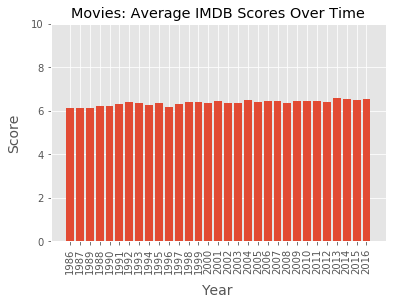

In [47]:
#plot average score of Movies
plt.style.use('ggplot')

plt.bar(range(len(year_parameter_averages["score"])), year_parameter_averages["score"].values(), align="center")
plt.xticks(range(len(year_parameter_averages["score"])), list(year_parameter_averages["score"].keys()))
plt.xticks(rotation=90)

plt.title("Movies: Average IMDB Scores Over Time")
plt.ylabel("Score", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)
plt.ylim([0,10])
plt.show()

(0, 10)

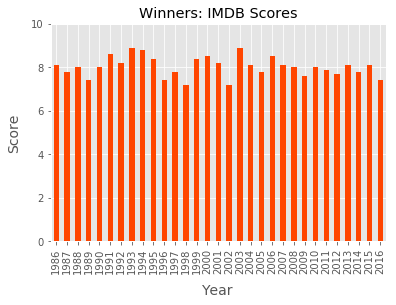

In [48]:
#plot Winners score 
plt.style.use('ggplot')

winners['score'].plot(x='year',y='score',kind='bar', figsize = (6,4), color = 'orangered')

plt.title("Winners: IMDB Scores")
plt.ylabel("Score", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)
plt.ylim([0,10])

The average IMDB score in the movie industry has been **fairly constant** since 1986. We can see **more variance in the IMDB scores for Best Pictures**. 

It gets even more interesting when you separate movies by low scores, medium scores, and high scores. 

In [49]:
low_scored_movies= movies.query('(score > 0) & (score < 4.0)') #create set with movies scored between 0 - 4.0
low_scored_movies.head()

,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year,profitability,title,release_year,is_winner
name,,,,,,,,,,,,,,,,,,
King Kong Lives,10000000,De Laurentiis Entertainment Group (DEG),USA,John Guillermin,Action,4711220,PG-13,1986-12-19,105,3.8,Brian Kerwin,4401,Ronald Shusett,1986,0.471122,King Kong Lives,1986,false
Shanghai Surprise,17000000,HandMade Films,UK,Jim Goddard,Adventure,2315683,PG-13,1986-08-29,97,3.1,Sean Penn,4339,John Kohn,1986,0.136217,Shanghai Surprise,1986,false
Meatballs III: Summer Job,508694,TMS Pictures,Canada,George Mendeluk,Comedy,2147228,R,1987-01-09,96,3.3,Sally Kellerman,2003,Janis Allen,1986,4.221060,Meatballs III: Summer Job,1986,false
Hardbodies 2,18494,Chroma III Productions,USA,Mark Griffiths,Comedy,78068,R,1986-09-12,88,2.9,James Karen,895,Mark Griffiths,1986,4.221261,Hardbodies 2,1986,false
Low Blow,15128,Action Communications,USA,Frank Harris,Action,63860,R,1986-04,100,3.5,Leo Fong,256,Leo Fong,1986,4.221311,Low Blow,1986,false


In [50]:
medium_scored_movies= movies.query('(score > 4.0) & (score < 7.0)') #create set with movies scored between 4.0 - 7.0 
medium_scored_movies.head()

,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year,profitability,title,release_year,is_winner
name,,,,,,,,,,,,,,,,,,
Top Gun,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,11.986707,Top Gun,1986,false
Flight of the Navigator,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,2.062735,Flight of the Navigator,1986,false
Pretty in Pink,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986,4.496851,Pretty in Pink,1986,false
Crocodile Dundee,8800000,Rimfire Films,Australia,Peter Faiman,Adventure,174635000,PG-13,1986-09-26,97,6.5,Paul Hogan,79465,Ken Shadie,1986,19.844886,Crocodile Dundee,1986,false
Lucas,6000000,Twentieth Century Fox Film Corporation,USA,David Seltzer,Comedy,8200000,PG-13,1986-03-28,100,6.8,Corey Haim,12228,David Seltzer,1986,1.366667,Lucas,1986,false


In [51]:
high_scored_movies= movies.query('(score > 7.0) & (score < 10.0)') #create set with movies scored between 7.0 - 10.0
high_scored_movies.head()

,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year,profitability,title,release_year,is_winner
name,,,,,,,,,,,,,,,,,,
Stand by Me,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,6.535927,Stand by Me,1986,false
Ferris Bueller's Day Off,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,11.689395,Ferris Bueller's Day Off,1986,false
Aliens,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,4.603257,Aliens,1986,false
Platoon,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,23.088428,Platoon,1986,true
Labyrinth,25000000,Henson Associates (HA),UK,Jim Henson,Adventure,12729917,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986,0.509197,Labyrinth,1986,false


In [52]:
print('Number of Low Scored Movies:') 
print(len(low_scored_movies)) #show count

Number of Low Scored Movies:
127


In [53]:
print('Number of Medium Scored Movies:')
print(len(medium_scored_movies)) #show count

Number of Medium Scored Movies:
4562


In [54]:
print('Number of High Scored Movies:')
print(len(high_scored_movies)) #show count


Number of High Scored Movies:
1788


8.1    5
7.8    4
8.0    4
7.4    3
8.4    2
8.2    2
8.9    2
7.2    2
8.5    2
7.6    1
8.6    1
7.7    1
8.8    1
7.9    1
Name: score, dtype: int64

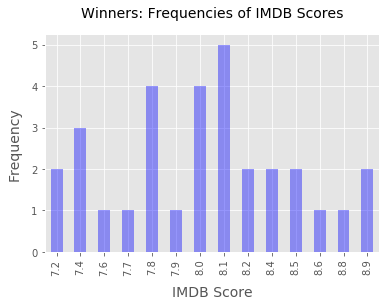

In [55]:
#plot Winners score frequency
plt.style.use('ggplot')

winners['score'].value_counts().sort_index().plot.bar(cmap="winter", alpha=0.4 )

plt.title('Winners: Frequencies of IMDB Scores', fontsize = 14, y = 1.05)
plt.ylabel("Frequency", fontsize = 14, labelpad = 10)
plt.xlabel("IMDB Score", fontsize = 14, labelpad = 10)

winners['score'].value_counts()

The frequencies chart shows that 8.1 is the most common score given to a Best Picture. Additionally, Best Pictures have a minimum score of 7.2 and maximum score of 8.9, indicating that all them are high-scoring movies compared to the movie industry where most movies are medium-scoring. This insight is a good indiction that if you want to make a Best Picture, it should be in the high-scoring category. But let's see how many of the top 30 highest scores in the Movies dataframe actually won Best Picture. 


In [56]:
sorted_score_movies= movies.sort_values(['score'], ascending=False) #create new set sorting Movies by highest score

w_w = sorted_score_movies.head(30).loc[(sorted_score_movies["is_winner"] == "true")]#locate winners in sorted_score_movies
w_w


,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year,profitability,title,release_year,is_winner
name,,,,,,,,,,,,,,,,,,
The Lord of the Rings: The Return of the King,94000000,New Line Cinema,USA,Peter Jackson,Adventure,377845905,PG-13,2003-12-17,201,8.9,Elijah Wood,1332020,J.R.R. Tolkien,2003,4.019637,The Lord of the Rings: The Return of the King,2003,true
Schindler's List,22000000,Universal Pictures,USA,Steven Spielberg,Biography,96067179,R,1994-02-04,195,8.9,Liam Neeson,956124,Thomas Keneally,1993,4.366690,Schindler's List,1993,true
Forrest Gump,55000000,Paramount Pictures,USA,Robert Zemeckis,Comedy,330252182,PG-13,1994-07-06,142,8.8,Tom Hanks,1402876,Winston Groom,1994,6.004585,Forrest Gump,1994,true
The Silence of the Lambs,19000000,Strong Heart/Demme Production,USA,Jonathan Demme,Crime,130742922,R,1991-02-14,118,8.6,Jodie Foster,990212,Thomas Harris,1991,6.881206,The Silence of the Lambs,1991,true
Gladiator,103000000,DreamWorks,USA,Ridley Scott,Action,187705427,R,2000-05-05,155,8.5,Russell Crowe,1081122,David Franzoni,2000,1.822383,Gladiator,2000,true


Surprisingly, only five films out of the top 30 IMDB scores in the last 31 years have won Best Picture. This goes to show that although a high score is an extremely important characteristic, there are still other variables that are good indicators of Best Picture likelihood. However, it is still a good idea to have a minimum score threshold above 7.2 since that has been the lowest score in the last 31 years to win.
What are other key characteristics for a Best Picture? Let's dive in. 

## Nominations

In [57]:
#calculate statistics of nominations 
print(winners[['nominations']].mean())
print(winners[['nominations']].median())
print(winners[['nominations']].std())
print(winners[['nominations']].mode())

nominations    9.516129
dtype: float64
nominations    9.0
dtype: float64
nominations    2.378669
dtype: float64
   nominations
0            8


Text(0,0.5,'nominations')

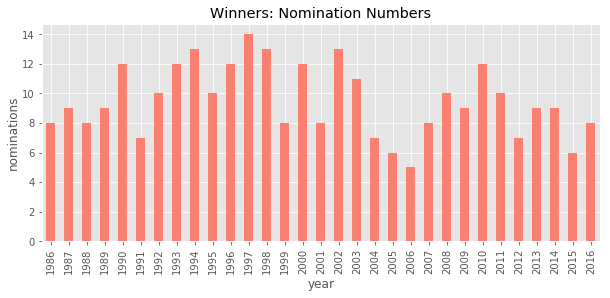

In [58]:
#plot Winners' nominations
plt.style.use('ggplot')

winners['nominations'].plot(x='year',kind='bar', figsize = (10,4), color = 'salmon' )
winners['nominations'].value_counts()

plt.title("Winners: Nomination Numbers")
plt.ylabel('nominations', labelpad = 2)

Although Best Picture is only one Academy Award, we can see that most Winners actually have at least 8 Academy Award nominations. In fact, the lowest number of nominations for a Best Picture winner since 1986 has been 5, and that has only happened once. This goes to show that even if a film has been nominated for Best Picture, it is very unlikely to win unless it has several nominations. This pattern does make sense since a film worthy of Best Picture is likely comprised of excellent acting, directing, writing, sound/makeup, etc. 

In [59]:
#print correlation between nominations and score
print(winners['nominations'].corr(winners['score']))

-0.08132653675846391


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-2.9,1.25,'Winners: Correlation Between Score and Nominations')

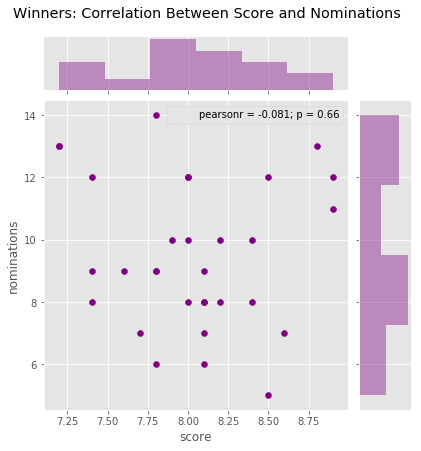

In [60]:
#plot correlation

plt.style.use('ggplot')

sns.jointplot(x="score", y="nominations", data=winners, color = 'purple');
plt.title('Winners: Correlation Between Score and Nominations', x = -2.9,y = 1.25)

Surprisingly, there appears to be no correlation between the IMDB score of a Winner and its number of nominations. Because the p-value is greater than .05, this observation is statistically insignificant, which is also reflected in the visual.

Obviously you need a nomination to win Best Picture, so we will be looking at other variables to compare to nominations. Let's see what other characteristics are important for winning Best Picture.

**Note**: In 2010, the Academy expanded the number of nominations for Best Picture from five to ten. This increases a film's chances of getting nominated, but makes it harder to win the award since your film is now competing with more nominees. 

## Budget 

In [61]:
#print respective budget statistics 
print(movies[['budget']].mean())
print(movies[['budget']].std())

print(winners[['budget']].mean())
print(winners[['budget']].std())

budget    2.495835e+07
dtype: float64
budget    3.667269e+07
dtype: float64
budget    3.712581e+07
dtype: float64
budget    4.015139e+07
dtype: float64


In [62]:
(3.712581e+07-2.495835e+07)/2.495835e+07 #(mean budget of winners - mean budget of movies)/ mean budget of movies

0.48751059264735047

Here, we can see that the average budget of a Winner is **significantly higher (49%)** than that of your typical Movie. **The standard deviation is also higher for Winners.** A higher budget gives the film the ability to hire more talent and obtain more resources, which can lead to a better quality film. 

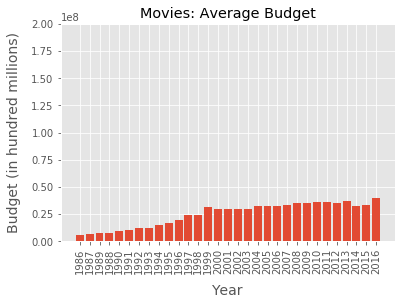

In [63]:
#plot average budget for Movies

plt.style.use('ggplot')

plt.bar(range(len(year_parameter_averages["budget"])), year_parameter_averages["budget"].values(), align="center")
plt.xticks(range(len(year_parameter_averages["budget"])), list(year_parameter_averages["budget"].keys()))
plt.xticks(rotation=90)

plt.title("Movies: Average Budget")
plt.ylabel("Budget (in hundred millions)", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)
plt.ylim([0,200000000])
plt.show()

Text(0.5,0,'Year')

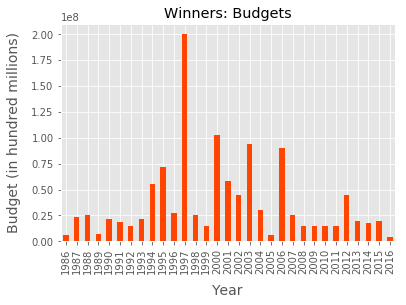

In [64]:
#plot Budget for Winners

plt.style.use('ggplot')

winners['budget'].plot(x='year',y='budget',kind='bar', figsize = (6,4), color = 'orangered')

plt.title("Winners: Budgets")
plt.ylabel("Budget (in hundred millions)", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)

When comparing the two bar graphs, we can also see a significant difference between the historical trends of the average budget in the movie industry and the budgets of Best Pictures. The movie industry had a **steady increase in the average budget from 1986-1999 and a modest increase since then** (other than between 2013-2016). **Meanwhile, the budget of a Best Picture from a given year has fluctuated greatly.** For example, we can see that no other Best Picture budget has even come close to  *Titanic* in 1997. 


This bar graph illustrates that even though the average budget of a Best Picture is 49% higher than the average movie, it is still very possible to win the Oscar with a "low" budget. Best Pictures from 2013-2016 all had budgets below 25 million USD (which is the industry average), noticably Moonlight (2016) with a budget of only 4 million USD.  

In [65]:
#print correlations between budget and score/nominations
print(winners['score'].corr(winners['budget']))
print(winners['nominations'].corr(winners['budget']))

0.24015975667972178
0.35525797909807383


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-3,1.2,'Winners: Correlation Between Score and Budget')

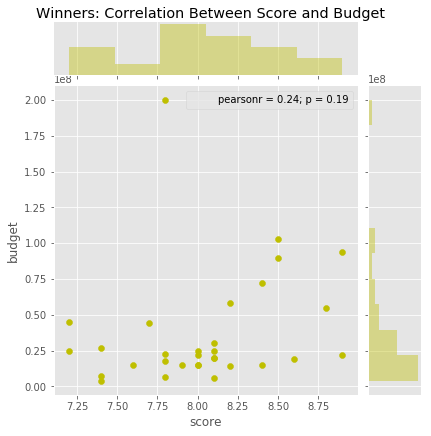

In [66]:
#plot correlation

plt.style.use('ggplot')

sns.jointplot(x="score", y="budget", data=winners, color = 'y');
plt.title('Winners: Correlation Between Score and Budget',x = -3, y = 1.2)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-3,1.2,'Winners: Correlation Between Nominations and Budget')

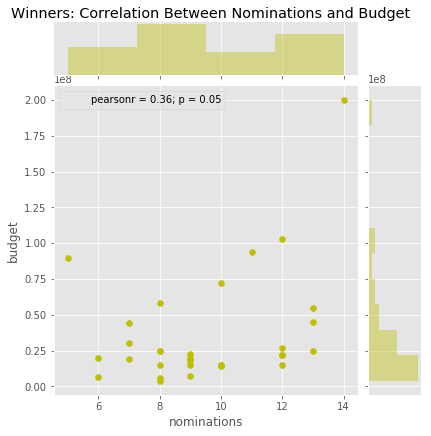

In [67]:
#plot correlation

plt.style.use('ggplot')

sns.jointplot(x="nominations", y="budget", data=winners, color = 'y');
plt.title('Winners: Correlation Between Nominations and Budget', x = -3, y = 1.2)

The correlation does not seem to be that strong between score and budget, and there is a slightly moderate correlation between number of nominations and budget (the p-value for nominations and budget is .05, which makes the statistical signifigance a little open-ended). This makes sense, as a higher-budget will be able to afford you higher caliber movie stars, sound editors, costume designers, technology etc. It might not be as high as anticipated because it is not every movie's goal to win Best Picture. Many high-budget action films, for example, care more about putting money into sound editing, special effects, and stars/directors with the goal of achieving a high box office, not winning an Oscar award (although Oscar nominations/awards tend to give a movie more buzz, which leads to more people going out and seeing it). Nonetheless, we can see some significant outliers in the bar graph, especially with low-budget movies. While *Titanic* with a 200 million USD budget won Best Picture, a few relatively "low-budget" movies have also won such as *Moonlight* (2016) and *Crash* (2005). 

## Domestic Gross

In [68]:
#print respective gross statistics 
print(movies[['gross']].mean())
print(movies[['gross']].std())

print(winners[['gross']].mean())
print(winners[['gross']].std())

gross    3.329592e+07
dtype: float64
gross    5.769639e+07
dtype: float64
gross    1.376186e+08
dtype: float64
gross    1.248718e+08
dtype: float64


In [69]:
1.376186e+08/3.329592e+07 #(mean gross of winners)/ mean gross of movies

4.133197100425518

Here, we can see that **the average gross of a Winner is not only much higher (over 4x) than the average gross of a Movie, but also has a lower standard deviation.** From these statistics, we can assume audiences would rather see a high-scoring, hyped-up film than an average, medium-scored movie. 

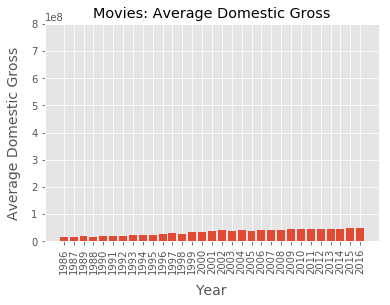

In [70]:
#plot average domestic gross of Movies

plt.style.use('ggplot')

plt.bar(range(len(year_parameter_averages["gross"])), year_parameter_averages["gross"].values(), align="center")
plt.xticks(range(len(year_parameter_averages["gross"])), list(year_parameter_averages["gross"].keys()))
plt.xticks(rotation=90)

plt.title("Movies: Average Domestic Gross")
plt.ylabel("Average Domestic Gross", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)
plt.ylim([0,800000000])

plt.show()

**Note:** We set the y-axis limit to as high as 800,000,000 because *Titanic* (from the Winners dataframe) had a gross close to that, and we wanted both graphs to have the same axis scale. Other graphs in our project also have large y-axis scales in order be consistent between Movies and Winners graphs and to properly display Winners outliers.

Text(0.5,0,'Year')

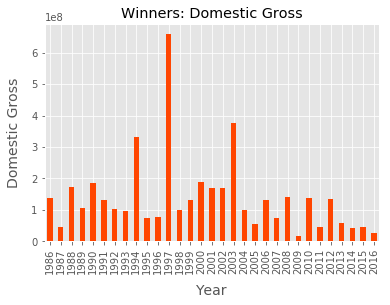

In [71]:
#plot domestic gross of Winners

plt.style.use('ggplot')

winners['gross'].plot(x='year',y='gross',kind='bar', figsize = (6,4), color = 'orangered')

plt.title("Winners: Domestic Gross")
plt.ylabel("Domestic Gross", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)

The Domestic Gross graphs between Movies and Winners are very different. For the most part, since 1986, the movie industry has had a steady increase in domestic gross. However, this is mostly due to ticket prices going up (partially inflation) and an increase in the number of theaters. But Best Pictures have had a lot of variance. In fact, looking at the graph, Best Pictures from 2004 onwards have grossed significantly less than 1986-2003, especially when you take inflation into account.

In [72]:
#print respective correlations
print(winners['score'].corr(winners['gross']))
print(winners['nominations'].corr(winners['gross']))

0.24818010599041154
0.49309794277344726


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-2.9,1.2,'Winners: Correlation Between Score and Domestic Gross')

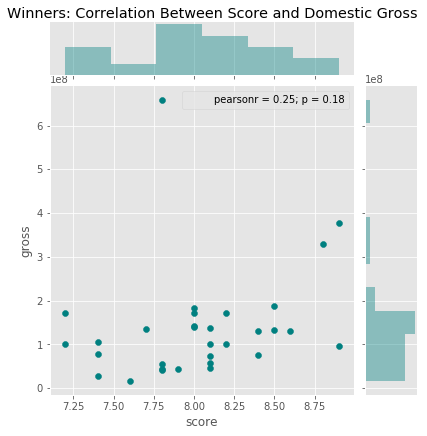

In [73]:
#plot correlation
plt.style.use('ggplot')

sns.jointplot(x="score", y="gross", data=winners, color = 'teal');
plt.title('Winners: Correlation Between Score and Domestic Gross', x = -2.9 , y = 1.2)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-2.9,1.2,'Winners: Correlation Between Nominations and Domestic Gross')

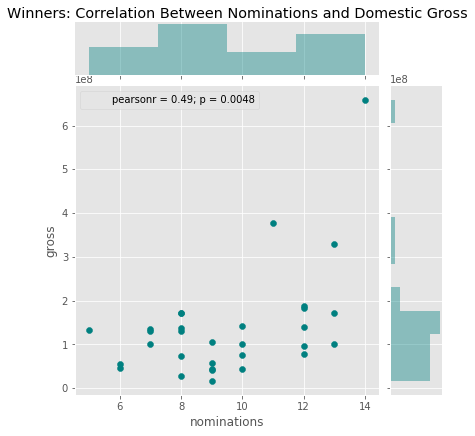

In [74]:
#plot correlation
plt.style.use('ggplot')

sns.jointplot(x="nominations", y="gross", data=winners, color = 'teal');
plt.title('Winners: Correlation Between Nominations and Domestic Gross', x = -2.9, y = 1.2)

While there is a very weak/ no correlation between score and gross, there is still a moderate positive correlation between nominations and gross (p-value is also less than .05). 

## Profitability

In [75]:
#print respective profitability statistics 
print(movies[['profitability']].mean())
print(movies[['profitability']].std())

print(winners[['profitability']].mean())
print(winners[['profitability']].std())


profitability    4.221122
dtype: float64
profitability    92.53111
dtype: float64
profitability    5.410743
dtype: float64
profitability    4.505234
dtype: float64


In [76]:
(5.577295-4.221122)/4.221122 #(profitabilty of winners - profitabilty of movies)/profitabilty of movies

0.32128258789961534

**Winners on average are 32% more profitable (domestically) than Movies and also have a much lower standard deviation.** This is likely because of the high number of flops and box office successes in Movies, making the standard deviation much higher for the set of 6000.  

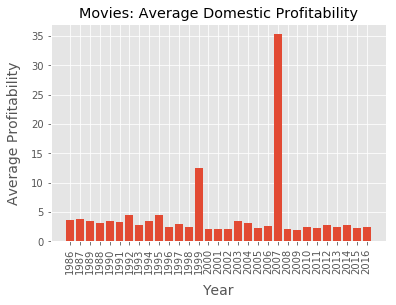

In [77]:
#plot average profitability of Movies
plt.style.use('ggplot')

plt.bar(range(len(year_parameter_averages["profitability"])), year_parameter_averages["profitability"].values(), align="center")
plt.xticks(range(len(year_parameter_averages["profitability"])), list(year_parameter_averages["profitability"].keys()))
plt.xticks(rotation=90)
plt.ylabel("Average Profitability", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)
plt.title('Movies: Average Domestic Profitability')
plt.show()

Other than the two outliers, profitability is relatively consistent, but there has still been a slight decrease in recent years compared to the 20th century. 

**Note:** Unfortunately, we were unable to figure out why 2007 and 1999 are such big outliers in the chart. We looked through our code extensively and could not find a cause/error for this strange outcome. O

Text(0.5,0,'Year')

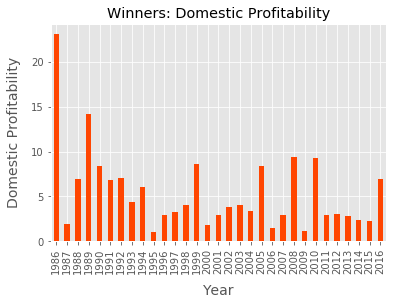

In [78]:
#plot profitability of Winners
plt.style.use('ggplot')

winners['profitability'].plot(x='year',y='profitability',kind='bar', figsize = (6,4), color = 'orangered')

plt.title("Winners: Domestic Profitability")
plt.ylabel("Domestic Profitability", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)

As shown above, the profitability of Winners has fluctuated significantly since 1986. 

In [79]:
#print respective correlations
print(winners['score'].corr(winners['profitability']))
print(winners['nominations'].corr(winners['profitability']))

-0.04783127174247695
-0.06882518479015814


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-2.8,1.2,'Winners: Correlation Between Score and Profitability')

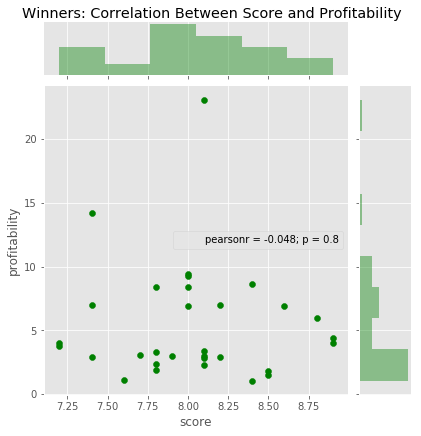

In [80]:
#plot correlation

sns.jointplot(x="score", y="profitability", data=winners, color = 'g');
plt.title('Winners: Correlation Between Score and Profitability', x = -2.8, y = 1.2)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-2.8,1.2,'Winners: Correlation Between Nominations and Profitability')

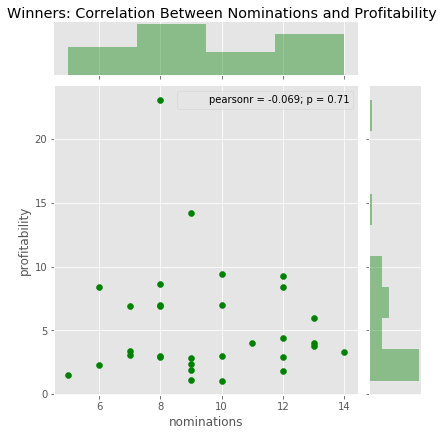

In [81]:
#plot correlation
plt.style.use('ggplot')

sns.jointplot(x="nominations", y="profitability", data=winners, color = 'g');
plt.title('Winners: Correlation Between Nominations and Profitability', x = -2.8, y = 1.2)

There are no correlations between the domestic profitability of a winner and its score/ nominations. P-values are very high at p = 0.8 and 0.71.  

## Runtime

In [82]:
#print respective runtime statistics 
print(movies[['runtime']].mean())
print(movies[['runtime']].std())

print(winners[['runtime']].mean())
print(winners[['runtime']].std())

runtime    106.485069
dtype: float64
runtime    17.95083
dtype: float64
runtime    137.677419
dtype: float64
runtime    27.931329
dtype: float64


In [83]:
(137.677419-106.485069)/106.485069 #(runtime of winners - runtime of movies)/runtime of movies

0.29292698303083214

**At 2 hours and 17 minutes on average, winners have 29% (31 minute) longer runtimes than a typical movie, but the standard deviation is also higher.** This shows a trend that the Academy prefers longer movies.

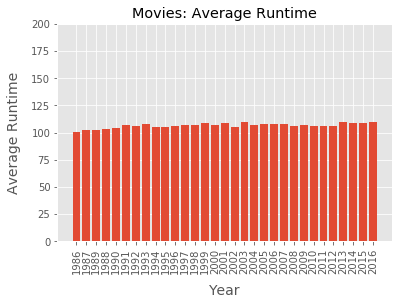

In [84]:
#plot average runtime of Movies
plt.style.use('ggplot')

plt.bar(range(len(year_parameter_averages["runtime"])), year_parameter_averages["runtime"].values(), align="center")

plt.xticks(range(len(year_parameter_averages["runtime"])), list(year_parameter_averages["runtime"].keys()))
plt.xticks(rotation=90)

plt.title("Movies: Average Runtime")
plt.ylabel("Average Runtime", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)
plt.ylim([0,200])
plt.show()

Text(0.5,0,'Year')

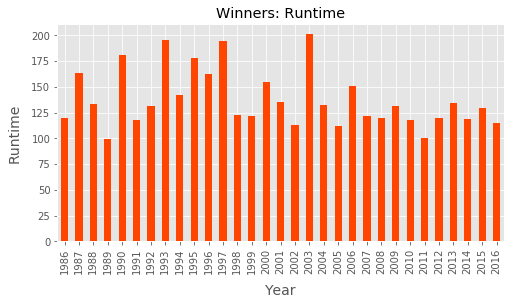

In [85]:
#plot runtime of winners
plt.style.use('ggplot')

winners['runtime'].plot(x='year',y='runtime',kind='bar', figsize = (8,4), color = 'orangered')

plt.title("Winners: Runtime")
plt.ylabel("Runtime", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)

Through these two graphs, one can see the signifcant difference in variance between Runtimes in *Movies* comparied to Runtimes in *Winners*. The movie industry as a whole has maintained pretty much the same average runtime since 1986 (106 minutes). But Best Picture runtimes have fluctuated quite a bit over the years. It also makes sense that Best Pictures are significantly longer films.

The sole purpose of the average movie in the industry is to make as much money as possible at the box office. A shorter runtime allows a theater to have more showings of your movie per day, which makes the film more profitable. The longer the runtime, the more it messes up that strategy, which is why there is a real pressure in the movie industry to keep films shorter. However, when a major goal/purpose of your film is to get nominated for an Academy Award or win Best Picture, the crew is more willing to have a longer runtime if that helps increase the quality of the movie.

In [86]:
#print respective correlations
print(winners['score'].corr(winners['runtime']))
print(winners['nominations'].corr(winners['runtime']))

0.45849122346369797
0.4159989323471434


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-2.8,1.2,'Winners: Correlation Between Score and Runtime')

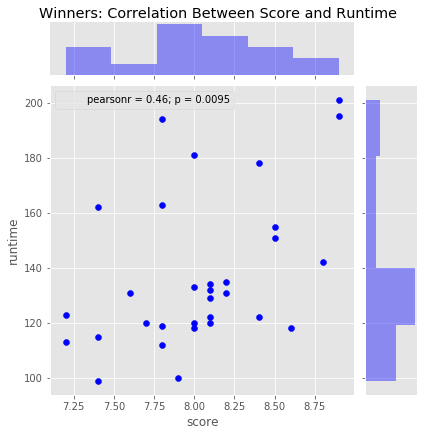

In [87]:
#plot correlation
plt.style.use('ggplot')

sns.jointplot(x="score", y="runtime", data=winners, color = 'b');
plt.title('Winners: Correlation Between Score and Runtime', x = -2.8, y = 1.2)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-2.8,1.2,'Winners: Correlation Between Nominations and Runtime')

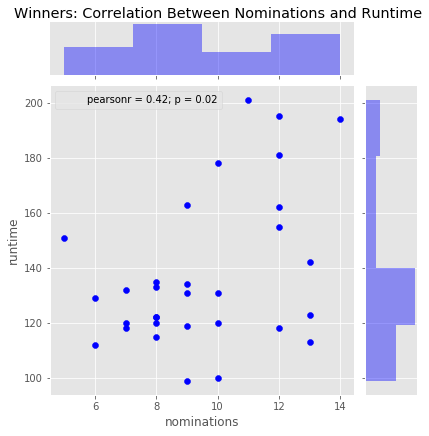

In [88]:
#plot correlation
plt.style.use('ggplot')

sns.jointplot(x="nominations", y="runtime", data=winners, color = "b");
plt.title('Winners: Correlation Between Nominations and Runtime', x = -2.8, y = 1.2)

There are also moderate correlations between the runtime of a winner and its score/nominations **(p-values for both plots are less than .05 which indicates statistical significance)**. It appears both users and the Academy prefer longer movies.

**Note:** When we say users, we mean IMDB users, but we are using them to represent the general movie-going/movie-watching public since users are the data we have and the fact that anybody can make an IMDB account.

## Votes

In [89]:
#print respective votes statistics 
print(movies[['votes']].mean())
print(movies[['votes']].std())

print(winners[['votes']].mean())
print(winners[['votes']].std())

votes    70851.33888
dtype: float64
votes    130262.213792
dtype: float64
votes    558711.548387
dtype: float64
votes    363520.905427
dtype: float64


In [90]:
558711.548387/70851.33888 #(votes of winners)/votes of movies

7.885687937856511

**Surprisingly, Winners have almost 8x more votes on IMDB than Movies!**

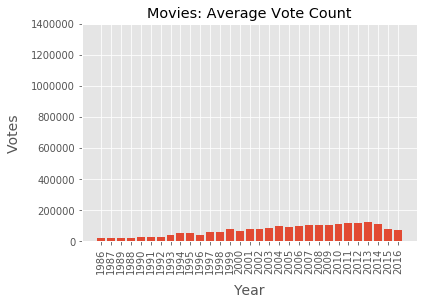

In [91]:
#plot average vote count of Movies
plt.style.use('ggplot')

plt.bar(range(len(year_parameter_averages["votes"])), year_parameter_averages["votes"].values(), align="center")
plt.xticks(range(len(year_parameter_averages["votes"])), list(year_parameter_averages["votes"].keys()))
plt.xticks(rotation=90)

plt.title("Movies: Average Vote Count")
plt.ylabel("Votes", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)
plt.ylim([0,1400000])
plt.show()

Text(0.5,0,'Year')

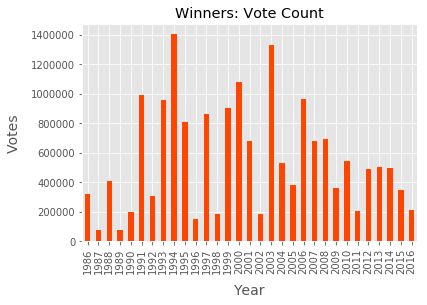

In [92]:
#plot vote count of Winners
plt.style.use('ggplot')

winners['votes'].plot(x='year',y='votes',kind='bar', figsize = (6,4), color = 'orangered')

plt.title("Winners: Vote Count")
plt.ylabel("Votes", fontsize = 14, labelpad = 10)
plt.xlabel("Year", fontsize = 14, labelpad = 10)

Comparing both Votes graphs, the sheer volume of votes between Movies and Winners is astonishing. The movie industry has also seen an overall slightly upward trend in vote counts over the years while the Best Pictures have fluctuated greatly. However, both graphs show a dropping off in recent years. Our rationale behind the large number difference is that in order to win Best Picture, your movie should have received a lot of buzz/hype prior to the awards. In addition, more IMDB users may have a bias towards only taking the time to review a movie they enjoyed.  As long the score reviews are positive, votes in the hundreds of thousands means the film has been exposed to more people and thus may have a higher chance than your average movie of winning Best Picture. 

In [93]:
#print respective correlations
print(winners['score'].corr(winners['votes']))
print(winners['nominations'].corr(winners['votes']))

0.8337311276158713
0.1045567042788928


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-2.8,1.2,'Winners: Correlation Between Score and Votes')

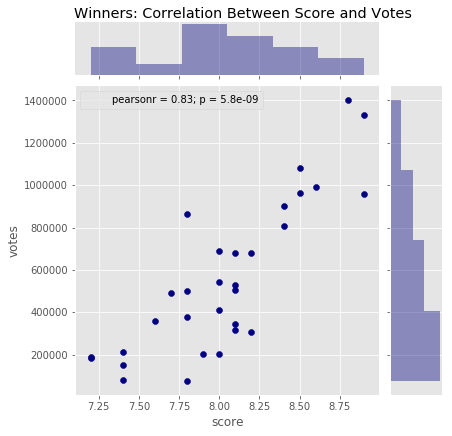

In [94]:
#plot correlation
plt.style.use('ggplot')

sns.jointplot(x="score", y="votes", data=winners, color = 'navy');
plt.title('Winners: Correlation Between Score and Votes', x = -2.8, y = 1.2)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-2.8,1.2,'Winners: Correlation Between Nominations and Votes')

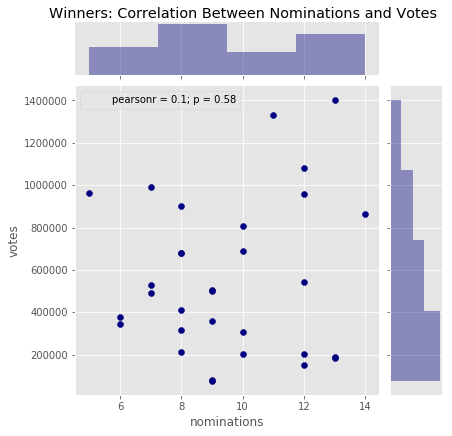

In [95]:
#plot correlation
sns.jointplot(x="nominations", y="votes", data=winners, color = 'navy');
plt.title('Winners: Correlation Between Nominations and Votes', x = -2.8, y = 1.2)

While there is no correlation between nominations and votes, there is a surprisingly strong correlation between score and votes of .83 (p-value is much less than .05). Again, this might be because of what we explained earlier: user bias in reviewing movies one really likes compared to ones they found mediocre or disliked. 

## Production Companies

In [96]:
#print respective modes
print(movies[['company']].mode())
print(winners[['company']].mode())


              company
0  Universal Pictures
        company
0  Warner Bros.


The most common production company in the movie industry is Universal Pictures, but Warner Bros. has been most successful in winning Best Picture.

Text(0,0.5,'')

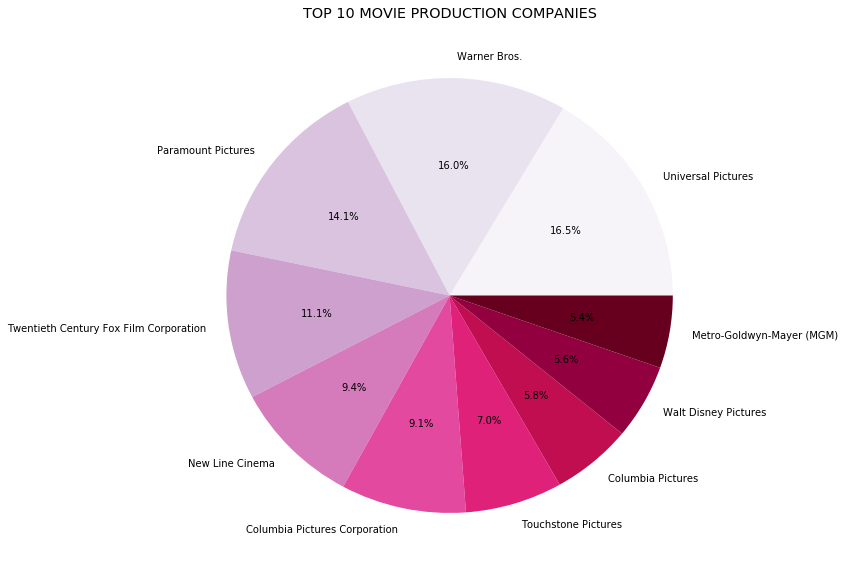

In [97]:
#create Movies top production companies pie chart
plt.style.use('ggplot')

movies.company.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap = 'PuRd')
plt.title('TOP 10 MOVIE PRODUCTION COMPANIES')
plt.ylabel("")

Text(0,0.5,'')

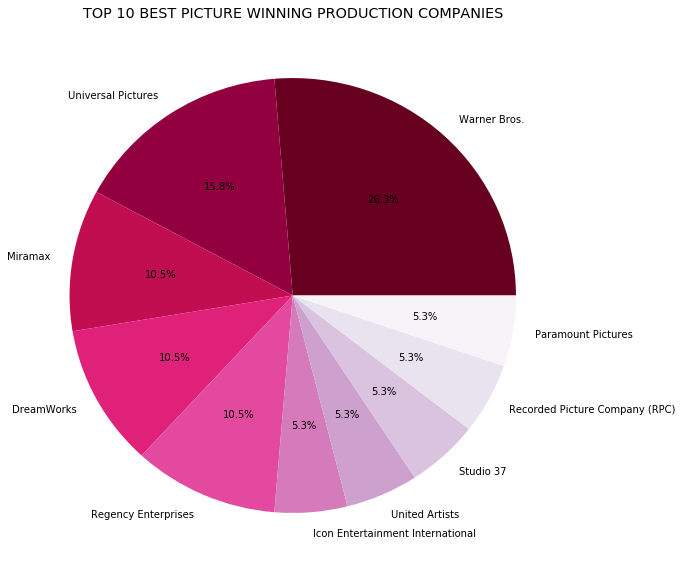

In [98]:
#create Winners top production companies pie chart
plt.style.use('ggplot')

winners.company.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap='PuRd_r')
plt.title('TOP 10 BEST PICTURE WINNING PRODUCTION COMPANIES')
plt.ylabel("")

There seems to be some overlap between the top production companies in the movie industry and the top Best Picture production companies. The top 4 production companies are also included in the top 10 Best Picture companies: Warner Bros, Paramount, Twentieth Centry Fox Film Corporation, and Universal Pictures. 

## Directors

In [99]:
#print respective modes
print(movies[['director']].mode())
print(winners[['director']].mode())

      director
0  Woody Allen
         director
0  Clint Eastwood


The most popular director in the movie industry by count is Woody Allen, but Clint Eastwood has directed the most Best Pictures. 

Woody Allen             33
Clint Eastwood          24
Steven Spielberg        21
Steven Soderbergh       21
Ron Howard              19
Ridley Scott            19
Barry Levinson          18
Spike Lee               18
Stephen Frears          17
Tim Burton              17
Richard Linklater       17
Oliver Stone            17
Bruce Beresford         16
Joel Schumacher         16
Garry Marshall          15
Martin Scorsese         15
Rob Reiner              15
Renny Harlin            15
Chris Columbus          15
Tony Scott              14
Wes Craven              14
Robert Zemeckis         14
Dennis Dugan            14
Pedro AlmodÃ³var        14
Robert Rodriguez        13
Neil Jordan             13
Roger Donaldson         13
Ang Lee                 13
Michael Apted           13
David Cronenberg        12
                        ..
John Ottman              1
GÃ©rard KikoÃ¯ne         1
Olatunde Osunsanmi       1
Paul King                1
William Richert          1
Rob Hedden               1
B

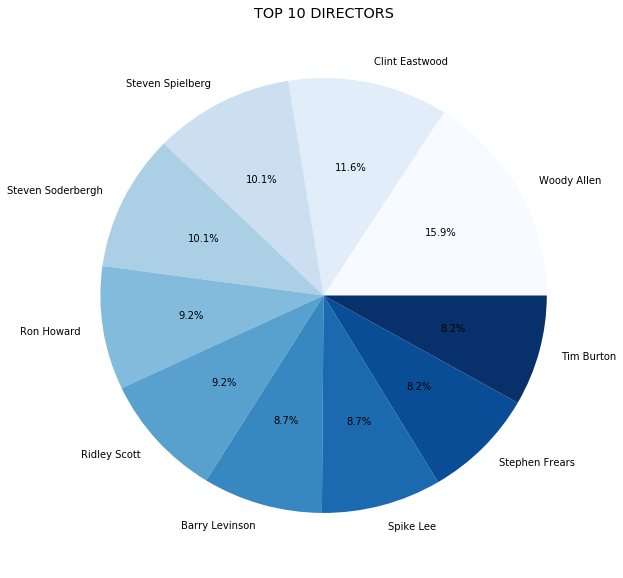

In [100]:
#create Movies top directors pie chart with value counts
plt.style.use('ggplot')

movies.director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap = 'Blues')
plt.title('TOP 10 DIRECTORS')
plt.ylabel('')

movies['director'].value_counts()

**Interesting Observation:** all 30 of the top directors in Hollywood are men; 0 women. Is this changing? We will revisit this after we analyze all of the respective variables.

Clint Eastwood                 2
Ben Affleck                    1
James Cameron                  1
Tom McCarthy                   1
Peter Jackson                  1
Kevin Costner                  1
Danny Boyle                    1
Anthony Minghella              1
Jonathan Demme                 1
Sam Mendes                     1
Kathryn Bigelow                1
Robert Zemeckis                1
Ethan Coen                     1
Bernardo Bertolucci            1
Ridley Scott                   1
Rob Marshall                   1
Ron Howard                     1
Steve McQueen                  1
Paul Haggis                    1
Tom Hooper                     1
Barry Jenkins                  1
John Madden                    1
Oliver Stone                   1
Mel Gibson                     1
Michel Hazanavicius            1
Alejandro Gonzalez Inarritu    1
Bruce Beresford                1
Barry Levinson                 1
Martin Scorsese                1
Steven Spielberg               1
Name: dire

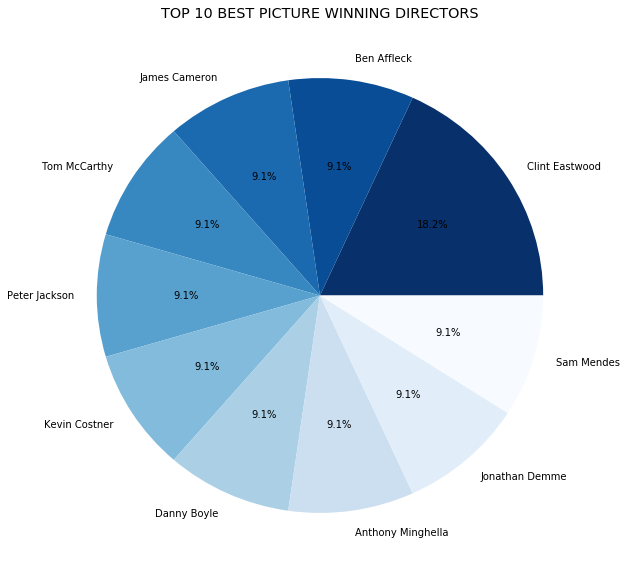

In [101]:
#create Winners top directors pie chart with value counts 
plt.style.use('ggplot')

winners.director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap = 'Blues_r')
plt.title('TOP 10 BEST PICTURE WINNING DIRECTORS')
plt.ylabel('')
winners['director'].value_counts()

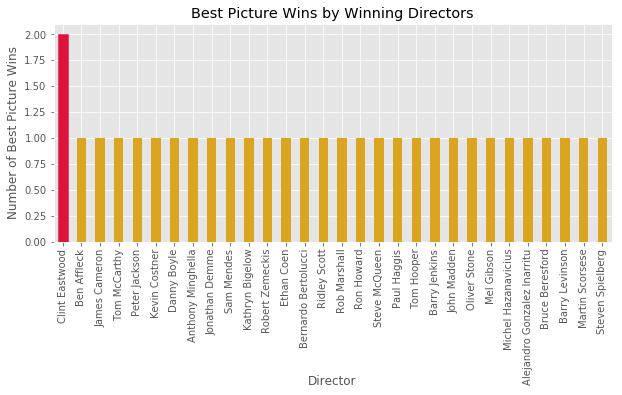

In [102]:
plt.style.use('ggplot')

ax = winners['director'].value_counts().plot(kind = 'bar', figsize=(10,4), color = 'goldenrod')

plt.title('Best Picture Wins by Winning Directors')
plt.ylabel('Number of Best Picture Wins')
plt.xlabel('Director', labelpad = -10)
ax.get_children()[0].set_color('crimson')

While the Top 10 Directors Pie Chart illustrates that there are several directors who have dominated Hollywood, the Top 10 Best Picture Directors charts and value counts show that other than Clint Eastwood, not a single director in the last 30 years has directed more than one Best Picture.

## Movie Stars 

In [103]:
#print respective modes
print(movies[['star']].mode())
print(winners[['star']].mode())


           star
0  Nicolas Cage
                star
0  Leonardo DiCaprio
1      Russell Crowe


Nicolas Cage is the most popular star in the movie industry by star appearances, but Leonardo DiCaprio and Russell Crowe have been the stars in the most Best Pictures.  

Nicolas Cage             41
Robert De Niro           37
Denzel Washington        35
Tom Hanks                35
Bruce Willis             33
Johnny Depp              32
Adam Sandler             27
Ben Stiller              27
Tom Cruise               27
John Cusack              26
Eddie Murphy             25
Sylvester Stallone       25
Robin Williams           25
Kevin Costner            25
John Travolta            24
Steve Martin             24
Keanu Reeves             24
Mel Gibson               23
Jim Carrey               22
Brad Pitt                22
Arnold Schwarzenegger    22
George Clooney           22
Mark Wahlberg            22
Ben Affleck              22
Sandra Bullock           21
Jeff Bridges             21
Matthew McConaughey      21
Matt Damon               21
Harrison Ford            20
Anthony Hopkins          20
                         ..
Kristy Young              1
StÃ©phane Audran          1
Jerry O'Connell           1
Shannen Doherty           1
William Ragsdale    

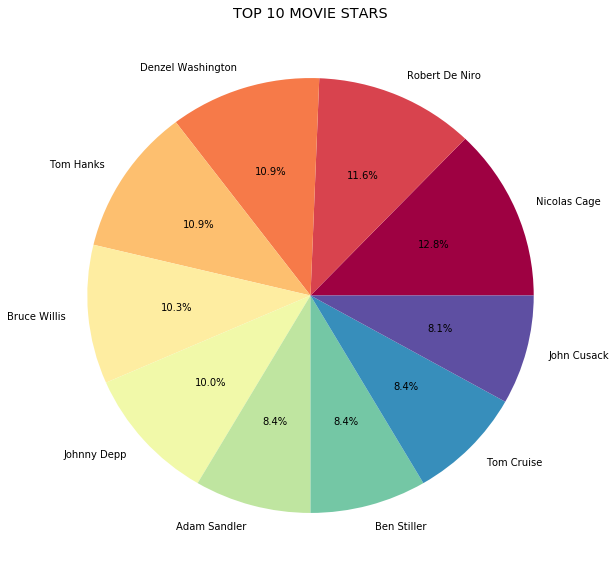

In [104]:
#create Movies top stars pie chart with value counts 
plt.style.use('ggplot')

movies.star.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap = 'Spectral')
plt.title('TOP 10 MOVIE STARS')
plt.ylabel('')
movies["star"].value_counts()

Many of the top actors that come to mind appear in this chart, as expected. But the most interesting insight about this pie chart and its value counts is that only one out of the top 30 stars in the last thirty years has been a woman (Sandra Bullock). 

Russell Crowe        2
Leonardo DiCaprio    2
Ben Affleck          1
Colin Firth          1
Elijah Wood          1
Chiwetel Ejiofor     1
Charlie Sheen        1
Kevin Costner        1
Clint Eastwood       1
RenÃ©e Zellweger     1
Jodie Foster         1
Trevante Rhodes      1
Hilary Swank         1
Morgan Freeman       1
Kevin Spacey         1
Liam Neeson          1
Jeremy Renner        1
Gwyneth Paltrow      1
Jean Dujardin        1
Tommy Lee Jones      1
Dustin Hoffman       1
Ralph Fiennes        1
Mel Gibson           1
Don Cheadle          1
Michael Keaton       1
John Lone            1
Tom Hanks            1
Mark Ruffalo         1
Dev Patel            1
Name: star, dtype: int64

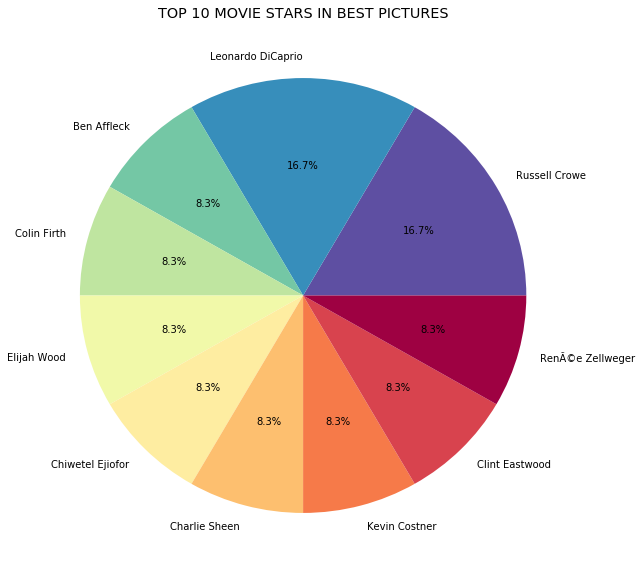

In [105]:
#create Winners top stars pie chart with value counts 
plt.style.use('ggplot')

winners.star.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap = 'Spectral_r')
plt.title('TOP 10 MOVIE STARS IN BEST PICTURES')
plt.ylabel('')
winners["star"].value_counts()

Similar to our observations on directors: while many actors (e.g. Cage, De Niro, Washington, Hanks, Willis, Depp) have dominated Hollywood, only two actors (Crowe and DiCaprio) have starred in more than one Best Picture, each with a count of two. 

## Writers

In [106]:
#print respective modes
print(movies[['writer']].mode())
print(winners[['writer']].mode())

        writer
0  Woody Allen
        writer
0  Paul Haggis


Woody Allen is the industry's top writer by volume, but Paul Haggis has written the most Best Pictures. 

Woody Allen            32
Luc Besson             24
Stephen King           22
John Hughes            18
David Mamet            14
Pedro AlmodÃ³var       13
Tyler Perry            12
William Shakespeare    12
Wes Craven             11
Robert Rodriguez       11
Joel Coen              11
Lars von Trier         10
John Logan             10
Quentin Tarantino      10
Kevin Smith            10
M. Night Shyamalan     10
Jim Jarmusch           10
Brian Helgeland        10
Ehren Kruger           10
Michael Crichton       10
Steven Knight           9
Mike Leigh              9
John Grisham            9
Joe Eszterhas           8
Jane Austen             8
Judd Apatow             8
Leigh Whannell          8
Richard Linklater       8
Lilly Wachowski         8
Larry Cohen             8
                       ..
Ken Sanzel              1
RyÃ» Murakami           1
Ed Rosenbaum            1
Tom Kalin               1
Michael Radford         1
Peter HÃ¸eg             1
Sean Macaulay           1
Stephen Neig

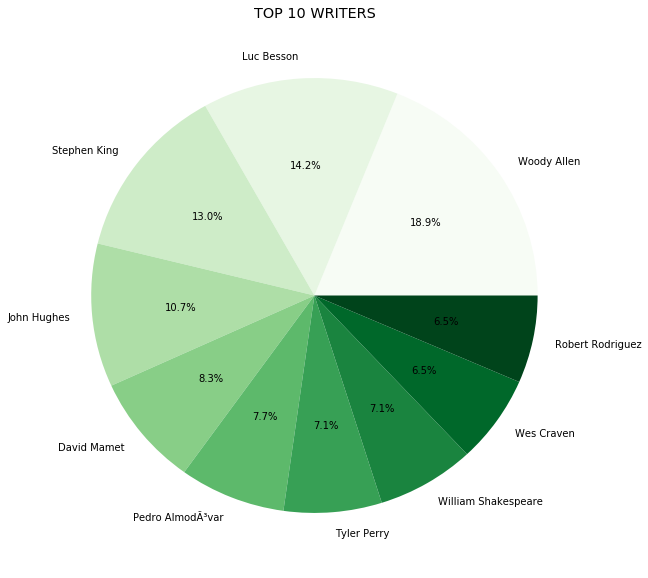

In [107]:
#create Movies top writers pie chart with value counts 
plt.style.use('ggplot')

movies.writer.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap = 'Greens')
plt.title('TOP 10 WRITERS')
plt.ylabel('')

movies["writer"].value_counts()

Only one writer out of the top 30 in Hollywood is a woman: Lilly Wachowski.

Paul Haggis                    2
Thomas Harris                  1
Michael Ondaatje               1
Michel Hazanavicius            1
Tom McCarthy                   1
Alejandro Gonzalez Inarritu    1
Marc Norman                    1
David Webb Peoples             1
Thomas Keneally                1
David Seidler                  1
Winston Groom                  1
Mark Boal                      1
Bill Condon                    1
James Cameron                  1
Alfred Uhry                    1
Akiva Goldsman                 1
Michael Blake                  1
John Ridley                    1
Simon Beaufoy                  1
William Monahan                1
Chris Terrio                   1
J.R.R. Tolkien                 1
Mark Peploe                    1
Barry Jenkins                  1
Alan Ball                      1
Oliver Stone                   1
Joel Coen                      1
David Franzoni                 1
Barry Morrow                   1
Randall Wallace                1
Name: writ

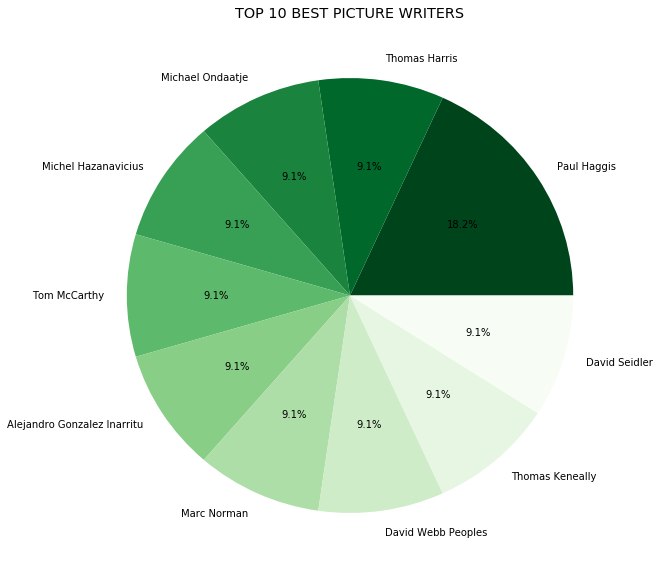

In [108]:
#create Winners top writers pie chart with value counts 
plt.style.use('ggplot')

winners.writer.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap= 'Greens_r')
plt.title('TOP 10 BEST PICTURE WRITERS')
plt.ylabel('')
winners["writer"].value_counts()

Again, this is a very similar pattern as both directors and stars. There are several prominent writers in the movie industry (e.g. Woody Allen, Luc Besson, Stephen King), but Paul Haggis is the only person who has written more than one Best Picture, with two under his belt.

## Genres

In [109]:
#print respective modes
print(movies[['genre']].mode())
print(winners[['genre']].mode())

    genre
0  Comedy
   genre
0  Drama


The most common genre in the movie industry is comedy, but dramas are the most common Best Picture genre. 

Comedy       2063
Drama        1424
Action       1300
Crime         514
Adventure     388
Biography     356
Animation     275
Horror        273
Mystery        38
Fantasy        32
Thriller       18
Romance        15
Family         14
Sci-Fi         13
Musical         4
War             2
Western         2
Name: genre, dtype: int64

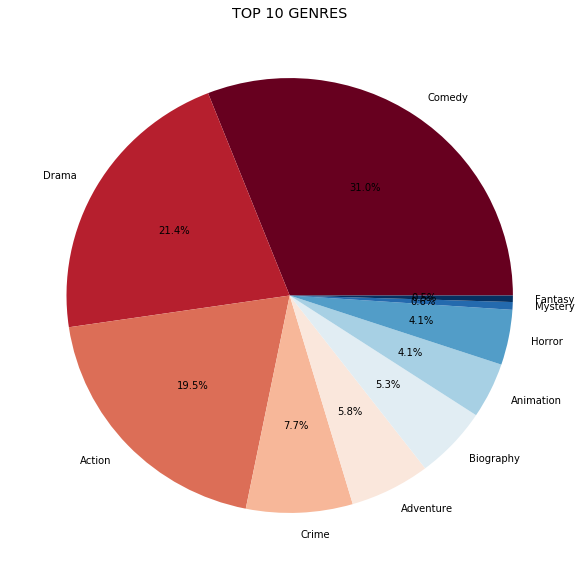

In [110]:
#create Movies top genres pie chart with value counts 
plt.style.use('ggplot')

movies.genre.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap = 'RdBu')
plt.title('TOP 10 GENRES')
plt.ylabel('')
movies["genre"].value_counts()

Drama        13
Biography     6
Comedy        4
Crime         4
Adventure     3
Action        1
Name: genre, dtype: int64

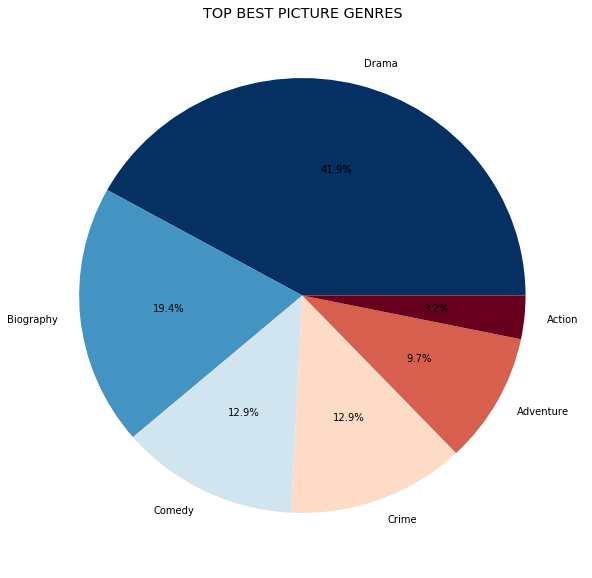

In [111]:
#create Winners top genres pie chart with value counts 
plt.style.use('ggplot')

winners.genre.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap = 'RdBu_r')
plt.title('TOP BEST PICTURE GENRES')
plt.ylabel('')
winners["genre"].value_counts()

There is quite a difference in the genre distribution between Movies and Winners. For example, while drama is the 2nd most popular genre in the movie industry, it is by far the most common type of Best Picture. Four of the top 10 genres in the movie industry have also never even won Best Picture. Let's dive deeper into the different genres of Movies and Winners to gain further insight. 

We will be separating Movies and Winners into sets by their respective genres in order to figure out why comedy Movies and drama Winners are so popular to make compared to other genres. 

We will be using the .describe function (which displays key numerical statistics) in order to compare the different genres.

**Note:** There is still a bias here because each movie is only categorized under one genre when many of them could fall under several genres.

In [112]:
#separate Movies into respective sets of genres 
drama_movies=movies['genre'].str.contains('Drama')
comedy_movies=movies['genre'].str.contains('Comedy')
action_movies=movies['genre'].str.contains('Action')

In [113]:
#separate Winners into respective sets of genres
drama_winners=winners['genre'].str.contains('Drama')
biography_winners=winners['genre'].str.contains('Biography')
comedy_winners=winners['genre'].str.contains('Comedy')
crime_winners=winners['genre'].str.contains('Crime')

**Note:** We tried to do the movies.describe() function instead of include 'all' since we will only be looking at numerical data and the table looks cleaner, but for some reason nominations (which we needed) was not included even though it was already an integer. We are unsure as to why this happened, but our final display is describe () because it looks much cleaner.

In [114]:
winners.nominations.dtypes

dtype('int64')

In [115]:
movies.describe()

,budget,gross,runtime,score,votes,year,profitability,release_year
count,6.731000e+03,6.731000e+03,6731.000000,6731.000000,6.731000e+03,6731.000000,6731.000000,6731.000000
mean,2.495835e+07,3.329592e+07,106.485069,6.374031,7.085134e+04,2000.918734,4.221122,2000.918734
std,3.667269e+07,5.769639e+07,17.950830,1.003406,1.302622e+05,8.944609,92.531110,8.944609
min,1.600000e+01,7.000000e+01,50.000000,1.500000,2.700000e+01,1986.000000,0.000021,1986.000000
25%,1.159671e+06,1.500892e+06,95.000000,5.800000,7.598500e+03,1993.000000,0.631349,1993.000000
50%,1.100000e+07,1.199040e+07,102.000000,6.400000,2.551100e+04,2001.000000,1.885267,2001.000000
75%,3.200000e+07,3.976220e+07,114.000000,7.100000,7.525450e+04,2009.000000,4.221055,2009.000000
max,3.000000e+08,9.366622e+08,366.000000,9.300000,1.861666e+06,2016.000000,7194.587333,2016.000000


In [116]:
movies[drama_movies].describe()

,budget,gross,runtime,score,votes,year,profitability,release_year
count,1.424000e+03,1.424000e+03,1424.000000,1424.000000,1.424000e+03,1424.000000,1424.000000,1424.000000
mean,1.359989e+07,1.716308e+07,111.747191,6.716854,5.293862e+04,2000.851826,3.156938,2000.851826
std,2.154761e+07,3.632944e+07,21.161445,0.873743,1.112430e+05,8.899838,6.208597,8.899838
min,4.280000e+02,1.800000e+03,71.000000,2.200000,1.390000e+02,1986.000000,0.000077,1986.000000
25%,2.388800e+05,4.996152e+05,100.000000,6.200000,4.848500e+03,1993.000000,0.602068,1993.000000
50%,4.000000e+06,3.438953e+06,107.000000,6.800000,1.611700e+04,2001.000000,4.221053,2001.000000
75%,1.800000e+07,1.870289e+07,120.000000,7.400000,5.073475e+04,2009.000000,4.221064,2009.000000
max,2.000000e+08,6.586723e+08,366.000000,8.800000,1.492073e+06,2016.000000,160.554067,2016.000000


Drama movies have a lower budget than the average movie, but average gross and profitability is also lower. Gross also has a lower standard deviation. Dramas also have a slightly higher average score than typical movies.

In [132]:
movies[comedy_movies].describe()

,budget,gross,runtime,score,votes,year,profitability,release_year
count,2.063000e+03,2.063000e+03,2063.000000,2063.000000,2.063000e+03,2063.000000,2063.000000,2063.000000
mean,1.569056e+07,2.572557e+07,101.200194,6.166505,4.481649e+04,1999.814833,3.203645,1999.814833
std,1.990194e+07,3.748671e+07,12.057097,0.982602,7.766335e+04,8.645998,10.129715,8.645998
min,1.280000e+02,3.090000e+02,73.000000,1.500000,1.250000e+02,1986.000000,0.000021,1986.000000
25%,9.826295e+05,1.665158e+06,93.000000,5.600000,6.585000e+03,1992.000000,0.816140,1992.000000
50%,8.000000e+06,1.081418e+07,100.000000,6.200000,1.851900e+04,1999.000000,2.740788,1999.000000
75%,2.200000e+07,3.446131e+07,107.000000,6.800000,5.100000e+04,2007.000000,4.221057,2007.000000
max,1.750000e+08,3.302522e+08,188.000000,8.800000,1.402876e+06,2016.000000,409.864000,2016.000000


Comedies have lower budgets, lower scores, lower profitability multiples, lower runtimes, lower gross, and lower gross standard deviations than the average movie. The lower gross standard deviation means it is a less risky film to make. Comedies are also more profitable than dramas. The combination of these characteristics provides a deeper understanding of why comedies are the most common genre in the movie industry. 

In [133]:
movies[action_movies].describe()

,budget,gross,runtime,score,votes,year,profitability,release_year
count,1.300000e+03,1.300000e+03,1300.000000,1300.000000,1.300000e+03,1300.000000,1300.000000,1300.000000
mean,4.905829e+07,5.601506e+07,108.940769,6.099769,1.113170e+05,2001.432308,2.032558,2001.432308
std,5.290977e+07,8.285557e+07,17.647355,1.018985,1.631606e+05,9.272167,8.248202,9.272167
min,1.290000e+02,5.470000e+02,75.000000,1.600000,1.030000e+02,1986.000000,0.000234,1986.000000
25%,8.493250e+06,6.738856e+06,97.000000,5.500000,1.544850e+04,1993.000000,0.527771,1993.000000
50%,3.200000e+07,2.648919e+07,105.500000,6.200000,5.436850e+04,2002.000000,1.129220,2002.000000
75%,7.000000e+07,6.929980e+07,118.000000,6.700000,1.438198e+05,2010.000000,2.837415,2010.000000
max,3.000000e+08,9.366622e+08,280.000000,9.000000,1.839571e+06,2016.000000,291.560000,2016.000000


Action movies are riskier movies to make, but the higher standard deviation could mean more potential than other genres. Action movies also have a higher average budget, but shorter runtime than other top genres. 

In [119]:
winners.describe()

,budget,gross,profitability,release_year,runtime,score,votes,nominations
count,3.100000e+01,3.100000e+01,31.000000,31.000000,31.000000,31.000000,3.100000e+01,31.000000
mean,3.712581e+07,1.376186e+08,5.410743,2001.000000,137.677419,8.029032,5.587115e+05,9.516129
std,4.015139e+07,1.248718e+08,4.505234,9.092121,27.931329,0.459125,3.635209e+05,2.378669
min,4.000000e+06,1.701781e+07,1.050000,1986.000000,99.000000,7.200000,7.640800e+04,5.000000
25%,1.500000e+07,6.547781e+07,2.873308,1993.500000,119.500000,7.800000,2.572610e+05,8.000000
50%,2.200000e+07,1.065933e+08,3.793056,2001.000000,131.000000,8.000000,4.981510e+05,9.000000
75%,4.475000e+07,1.560037e+08,6.994278,2008.500000,153.000000,8.300000,8.349050e+05,12.000000
max,2.000000e+08,6.586723e+08,23.088428,2016.000000,201.000000,8.900000,1.402876e+06,14.000000


In [120]:
winners[drama_winners].describe()

,budget,gross,profitability,release_year,runtime,score,votes,nominations
count,1.300000e+01,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,3.053077e+07,1.354314e+08,7.045581,2001.000000,131.307692,7.869231,435079.538462,9.076923
std,5.151937e+07,1.643501e+08,6.067741,10.708252,23.602205,0.332627,254777.178620,2.100061
min,4.000000e+06,1.701781e+07,1.134521,1986.000000,99.000000,7.400000,79478.000000,6.000000
25%,1.440000e+07,4.505578e+07,2.913016,1992.000000,120.000000,7.600000,304536.000000,8.000000
50%,1.500000e+07,1.011574e+08,6.913017,1999.000000,129.000000,8.000000,359240.000000,9.000000
75%,2.500000e+07,1.385306e+08,8.673107,2009.000000,132.000000,8.100000,528910.000000,10.000000
max,2.000000e+08,6.586723e+08,23.088428,2016.000000,194.000000,8.400000,899755.000000,14.000000


Making a drama Winner is very profitable and has a lower average budget than the typical Best Picture. It also has a shorter runtime and a lower average score. It has fewer nominations than your average Winner. All of these make it an attractive genre to make for the Best Picture Academy Award. 

In [121]:
winners[comedy_winners].describe()

,budget,gross,profitability,release_year,runtime,score,votes,nominations
count,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.00
mean,3.500000e+07,1.614823e+08,4.197116,2001.250000,119.500000,7.775000,4.944185e+05,12.25
std,1.825742e+07,1.237657e+08,1.284547,7.274384,17.710637,0.758837,6.056909e+05,1.50
min,1.500000e+07,4.467168e+07,2.978112,1994.000000,100.000000,7.200000,1.849430e+05,10.00
25%,2.250000e+07,8.640627e+07,3.589320,1997.000000,109.750000,7.200000,1.865120e+05,12.25
50%,3.500000e+07,1.355027e+08,3.902884,2000.000000,118.000000,7.550000,1.949275e+05,13.00
75%,4.750000e+07,2.105787e+08,4.510680,2004.250000,127.750000,8.125000,5.028340e+05,13.00
max,5.500000e+07,3.302522e+08,6.004585,2011.000000,142.000000,8.800000,1.402876e+06,13.00


If you decide to make a comedy Best Winner, it better have a lot of nominations (average number of nominations is more than 12). Also, there have only been four comedy Best Pictures in the last 31 years. 

In [122]:
winners[biography_winners].describe()

,budget,gross,profitability,release_year,runtime,score,votes,nominations
count,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000
mean,3.500000e+07,9.697720e+07,3.726607,1999.833333,153.833333,8.233333,594976.166667,10.00000
std,2.381596e+07,4.915446e+07,2.926378,10.127520,29.647372,0.382971,304201.787998,1.67332
min,1.500000e+07,4.398423e+07,1.050000,1987.000000,118.000000,7.800000,76408.000000,8.00000
25%,2.050000e+07,6.140399e+07,2.142668,1993.500000,134.250000,8.025000,514054.000000,9.00000
50%,2.250000e+07,8.583359e+07,2.888717,1998.000000,149.000000,8.150000,613153.000000,9.50000
75%,4.925000e+07,1.281149e+08,4.010976,2007.750000,174.250000,8.350000,775786.750000,11.50000
max,7.200000e+07,1.707423e+08,9.253163,2013.000000,195.000000,8.900000,956124.000000,12.00000


Biography Winners are not as profitable as the average winner, have a higher average score, more nominations (10) and a longer runtime, making it a less attractive type of film to make compared to a drama Winner. 

In [123]:
winners[crime_winners].describe()

,budget,gross,profitability,release_year,runtime,score,votes,nominations
count,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,3.512500e+07,9.799779e+07,4.930114,2002.250000,125.750000,8.250000,752724.750000,6.500000
std,3.738622e+07,3.959005e+07,3.246974,7.544314,17.327723,0.369685,285897.325492,1.290994
min,6.500000e+06,5.458030e+07,1.470937,1991.000000,112.000000,7.800000,379156.000000,5.000000
25%,1.587500e+07,6.935779e+07,2.596243,2001.500000,116.500000,8.025000,604298.500000,5.750000
50%,2.200000e+07,1.025133e+08,4.926276,2005.500000,120.000000,8.300000,820765.500000,6.500000
75%,4.125000e+07,1.311533e+08,7.260147,2006.250000,129.250000,8.525000,969191.750000,7.250000
max,9.000000e+07,1.323843e+08,8.396969,2007.000000,151.000000,8.600000,990212.000000,8.000000


Crime Winners have a lower budget, lower gross, lower profitability, shorter runtime, higher score, and lower average nomination count (6.5) than the average Winner.

## MPAA Rating

In [124]:
#print respective modes
print(movies[['rating']].mode())
print(winners[['rating']].mode())


  rating
0      R
  rating
0      R


The most common MPAA rating for both the overall movie industry and Best Pictures is R. But let's see if we gather any more insights through analyzing their respective pie charts.

R                3359
PG-13            1949
PG                945
NOT RATED         172
G                 146
UNRATED            71
Not specified      62
NC-17              22
TV-PG               1
B15                 1
B                   1
TV-14               1
TV-MA               1
Name: rating, dtype: int64

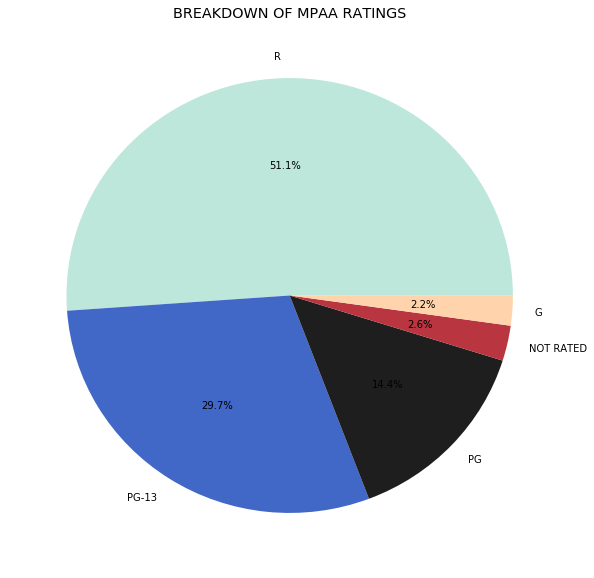

In [125]:
#create Movies MPAA rating pie chart with value counts 
plt.style.use('ggplot')
movies.rating.value_counts()[:5].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap = 'icefire')
plt.title('BREAKDOWN OF MPAA RATINGS')
plt.ylabel('')
movies["rating"].value_counts()

R        21
PG-13     9
PG        1
Name: rating, dtype: int64

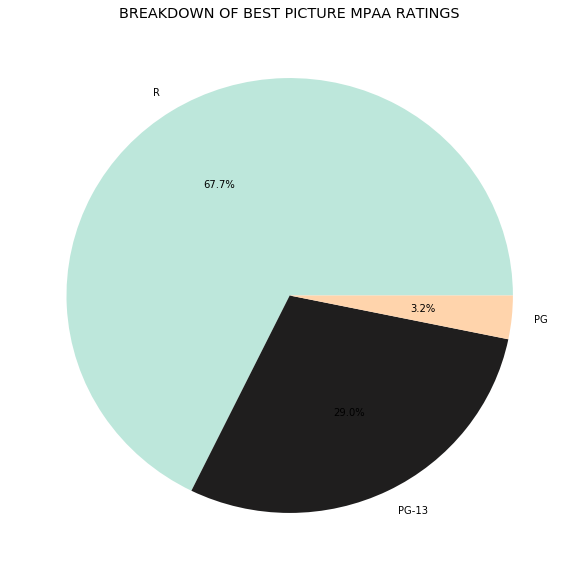

In [126]:
#create Winners MPAA rating pie chart with value counts 
plt.style.use('ggplot')
winners.rating.value_counts()[:5].plot.pie(autopct='%1.1f%%',figsize=(10,10), cmap = 'icefire')
plt.title('BREAKDOWN OF BEST PICTURE MPAA RATINGS')
plt.ylabel("")
winners["rating"].value_counts()

The R rating is much more common in Best Pictures, as it makes up over 2/3 of Winners. Another interesting observation is that only 1 PG rated movie since 1986 has won Best Picture: *Driving Miss Daisy* (1990). 

# Other Interesting Characteristics 

We have a couple other miscellaneous chacteristics that we thought were very interesting. 

## Character Length

We wanted to see whether there was a large difference between the length of the average Movie and the average Winner.

In [127]:
average_movie_charlength = np.average(movies['title'].astype(str).map(len).values)
average_winner_charlength = np.average(winners['name'].astype(str).map(len).values)

print(average_movie_charlength)
print(average_winner_charlength)

15.047689793492795
14.193548387096774


It turns out the average character length of a Best Picture is a mere one character less than the average movie, so it looks like sticking to an average title length is a safe bet. 

## Country

Although the Academy Awards are based in the United States, we were curious to see how many non-American Oscar Best Pictures there have been since 1986.  

In [128]:
winners['country'].value_counts()

USA       26
UK         4
France     1
Name: country, dtype: int64

In [129]:
uk_winners=winners.loc[(winners["country"] == "UK")] #define new set that locates UK Winners 
uk_winners

,name,budget,company,country,director,genre,gross,is_winner,profitability,rating,release_year,released,runtime,score,star,title,votes,writer,nominations
year,,,,,,,,,,,,,,,,,,,
1986,Platoon,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,true,23.088428,R,1986.0,1987-02-06,120,8.1,Charlie Sheen,Platoon,317585,Oliver Stone,8
1987,The Last Emperor,23000000.0,Recorded Picture Company (RPC),UK,Bernardo Bertolucci,Biography,43984230.0,true,1.912358,PG-13,1987.0,1988-04-15,163,7.8,John Lone,The Last Emperor,76408,Mark Peploe,9
2008,Slumdog Millionaire,15000000.0,Warner Bros.,UK,Danny Boyle,Drama,141319928.0,true,9.421329,R,2008.0,2008-12-25,120,8.0,Dev Patel,Slumdog Millionaire,690202,Simon Beaufoy,10
2010,The King's Speech,15000000.0,See-Saw Films,UK,Tom Hooper,Biography,138797449.0,true,9.253163,R,2010.0,2010-12-25,118,8.0,Colin Firth,The King's Speech,544927,David Seidler,12


In [130]:
french_winners=winners.loc[(winners["country"] == "France")] #define new set that locates French Winners
french_winners

,name,budget,company,country,director,genre,gross,is_winner,profitability,rating,release_year,released,runtime,score,star,title,votes,writer,nominations
year,,,,,,,,,,,,,,,,,,,
2011,The Artist,15000000.0,Studio 37,France,Michel Hazanavicius,Comedy,44671682.0,true,2.978112,PG-13,2011.0,2012-01-20,100,7.9,Jean Dujardin,The Artist,202820,Michel Hazanavicius,10


Only two other countries have made Oscar Best Pictures: the United Kingdom and France.  
UK films include: 
*Platoon*, *The Last Emperor*, *Slumdog Millionaire*, and *The King's Speech*  
French films include: 
*The Artist*

## Best Picture Release Months 

We decided to loop through the release dates of our Winners dataframe to plot the release month distribution of Best Pictures. We were curious whether there was a skew towards the end of the year for Best Picture releases.

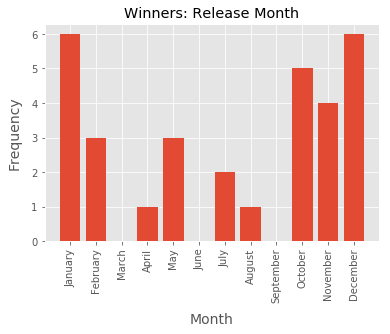

In [131]:
plt.style.use('ggplot')

winners["released_month"] = winners["released"].str.slice(5,7).astype(int)#create a new column released_month by splicing released
winner_release_dict = winners["released_month"].value_counts().sort_index().to_dict()#sort it and dictionary it

#array of months for readability
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#map numerical months to names
for i in range(len(months)):
  x = i+1
  if x in winner_release_dict.keys():
    winner_release_dict[months[i]] = winner_release_dict.pop(x)
  else:#add month for readability in graph even if it had no movies
    winner_release_dict[months[i]] = 0

#plot
plt.bar(range(len(winner_release_dict)), winner_release_dict.values(), align="center")
plt.xticks(range(len(winner_release_dict)), list(winner_release_dict.keys()))
plt.xticks(rotation=90)
plt.ylabel("Frequency", fontsize = 14, labelpad = 10)
plt.xlabel("Month", fontsize = 14, labelpad = 10)
plt.title('Winners: Release Month')
plt.show()

There is in fact a heavy skew towards the end of the year to release a Best Picture! 15 out of the last 31 Best Pictures were released in the last quarter of the year (Oct., Nov. , Dec.)! Surprisingly, 6 out of the last 31 Best Pictures were released in the very beginning of the year in January. Also, in the last 31 years, there has not been a single film released in March, June, or September that has won Best Picture.

# Conclusion

As shown through our data analysis, there are *significant* differences between Movies and Winners. Now that we know exactly and to what extent these differences are, we can hypothesize a movie that will have a better chance of winning Best Picture. However, before we break it down, we would like to address the biases in our report. 

Although the csv files were fairly extensive, the respective variables still limited us. And of course, we are limited to the data that we can find/ is released to the general public. There are still several other variables not present in the csv files (or perhaps not fully available at all) which would have helped further our analysis. These include: more Oscar nomination data, international/worldwide gross, marketing budgets, supporting actors/actresses, Metacritic scores, Rotten Tomatoes scores, Cinemascores, IMDB keywords, and themes. 

Nonetheless, based on our analysis, we have decided on the specifics for our hypothetical movie to increase its chances of winning Best Picture:

**Genre:** We should make a Drama, as they are by far the most common genre for Best Picture (42%). Additionally, the fact that previous Drama Winners have had lower budgets, lower scores, fewer nominations, and higher profitability multiples and still won makes it the most logical genre for us to pursue.

**Production Company:** Warner Bros. should be the production company considering they have had the most success in producing Best Pictures (five out of the last 31, 16%). 

**Country:** The film should be a U.S. film considering 87% of Best Pictures in the last 31 years have been U.S.-made.

**Director:** Since Clint Eastwood is the only director to have directed more than one Best Picture in the last 31 years, it could be argued that he should direct the film. However, given that he is 88 years old, it might be better to hire a trending director who has never directed a Best Picture.

**Writer:** We would consider hiring Paul Haggis to write the script. He is the writer of two Best Pictures: Crash and Million Dollar Baby. However, he also directed Crash. If not Paul Haggis, we would hire another Hollywood writer who has never written a Best Picture.

**Star:** We could hire either Russell Crowe or Leonardo DiCaprio because both are high-caliber actors and are the only people to star in more than one Best Picture. 

**MPAA Rating:** We would want to make an R-rated film for two reasons. First, 21 out of the last 31 Best Pictures have been R-rated. Second, if our movie is rated R, then we wouldn't have to worry about toning down/filtering our content (e.g. violence, language, substance abuse, sexual content, etc.) compared to PG-13 and PG films. 

**Runtime:** Our runtime should be relatively long. Although this would mean less showtimes in movie theaters per day, our primary goal is to win Best Picture, not to have the highest possible box office. Since our data shows that both audiences and the Academy prefer longer runtimes, any runtime around 2 hours and 17 minutes should do. 

**Score:** If we want a chance of winning Best Picture, we need to have a high IMDB score. Our goal would be to have a score above 8.0. This is the average score of prior Best Pictures and is also slightly above the average score of prior Drama Best Pictures (7.9). 

**Vote Count:** There is a strong correlation between Score and Number of Votes (0.83). Of course correlation does not mean causation, but nonetheless we feel we should try to get at least 500,000 votes to stick close to the Best Pictures votes average (558,000). Also, receiving hundreds of thousands of votes could lead to a lot of buzz, which could help convey a positive perception of our film.

**Budget:** Anything more than 25 million USD is good considering only one Best Picture (*Argo*) between 2008 and 2016 had a budget above 25 million USD. Dramas also do not require super high budgets compared to other genres such as action or adventure. Ultimately, a good budget will allow for more talent and resources, which will increase the overall likelihood of a better quality movie.

**Domestic Gross:** Winners typically gross significantly more than the average movie. However, recent Winners have not grossed nearly as much as the average Winner. Although box office is not the most important variable, we would still like to have a successful domestic gross around 150 million USD.  

**Profitability:** The profitability (domestic gross/ budget) of the average Best Picture is 5.41. However, the average Drama Best Picture has a profitability of 7.05. As stated earlier, our desired budget is 25 million USD and our desired domestic gross is 150 million USD (which means profitability would = 6). We would like our profitability to be anywhere between 5.41 and 7.05.

**Title Length:** Since Best Pictures have similar title lengths as average Movies (14 chracters vs. 15 characters), we are not too concerned with this variable as long as our title is not extremely short or extremely long. 

**Release Month:** We consider this a very important variable because of the large skew of Best Pictures being released towards the end of the year. Movies released around this time are closer to the actual Awards date (February of the following year) and therefore are fresher in viewers' minds. We would plan for a release during the peak holiday weekends of either October, November, or December. 

While these analytics provide numerous insights into the movie industry, it's important to note that ultimately Best Picture in the eyes of viewers and the Academy is a considered a reflection of "quality." It is extremely difficult, if not impossible, to quantify the quality of a movie and the talent, skill, and overall subjectivity behind the perception of films. 

It is also fascinating to see that the movie industry is changing radically right now, as it becomes more inclusive towards gender, race, and overall diversity. In fact, you could argue that given the political atmosphere of Hollywood, the Academy may even now have a bias towards these types of films (e.g., 2016 Winner: *Moonlight* and its themes of race and homosexuality; 2017 Winner: *The Shape of Water* and its themes of being an outsider or part of a minority). For example, we noted earlier in our analysis of directors, stars, and writers that women are almost non-existent in the value counts over the last 31 years. However, we expect that over the next few years, we will see more representation among women in Best Pictures. Perhaps, if we were to make a movie and try to increase its chances of winning Best Picture, we should also focus on diversity and strong social themes. But of course, this is a new trend and there is currently limited-to-no data to support this. Hopefully, in the coming years, if this trend continues, more data on these variables will be available, and one can create an even more accurate analysis of the key characteristics for winning Best Picture. 

**Note:** While the two of us (as avid movie lovers) used general knoweledge of the movie industry, the information on the movie industry changing radically was validated in a personal interview we conducted with professional screenwriter, David Ransil.







